In [5]:
import sys
sys.path.append('../../')

In [2]:
preprocessed_dataset_path = 'preprocessed_dataset/'

In [3]:
from codes.docs.analysis import data_preprocessing, data_exploration, visualisation, data_preprocessing_high_dimension,model_training
from codes.docs.analysis.gene_analysis import genetic_file_preprocess

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
%matplotlib inline
import tqdm

import statsmodels.api as sm
import statsmodels.formula.api as sfm

from scipy.stats import ttest_ind, pearsonr,zscore
import pandas as pd
import re

Here, the volumetric dataset is preprocessed to group the same brain regions.\
Then mass univariate test is preformed, across multiple regions.

# Main analysis

In [5]:
european_volumetric_dataset_term = pd.read_csv(
    preprocessed_dataset_path +
    'imaging_data/volumetric/term/european_volumetric_df.csv')
# mixed_volumetric_dataset_term = pd.read_csv(
#     preprocessed_dataset_path +
#     'imaging_data/volumetric/term/mixed_volumetric_df.csv')

In [6]:
all_PCs = genetic_file_preprocess.Cohort.preprocess_PRSice_PRS_Anc_files(file_path='../../dataset/ancestry_PCs/file3_only_europ_pca.eigenvec',column_prefix='euro_Anc_')

In [7]:
european_volumetric_dataset_term = pd.merge(european_volumetric_dataset_term,all_PCs[[f'euro_Anc_PC{i}' for i in range(11,101)]].reset_index(),
        on='ID',how='left')

In [8]:
european_volumetric_dataset_term = pd.read_csv(
    preprocessed_dataset_path +
    'imaging_data/volumetric/term/european_volumetric_df_batch2.csv')

In [14]:
# dependentVar = [
#     i for i in european_volumetric_dataset_term.columns
#     if bool(re.search('AAL \d',i))
# ]
# # df = european_volumetric_dataset_term.copy()
# # df = data_preprocessing.Volumes.Group_Imperial_volumes(df,grouping=None)
# # df = data_exploration.MassUnivariate.remove_outliers(df,
# #                                                     col=dependentVar,
# #                                                      threshold=3,
# #                                                     remove_schemes='percentage',
# #                                                     percentage_of_outlier=0.1)
# df = df.rename(columns = {'AAL 93':'AAL 109'})

In [ ]:
# imputed_PRS = genetic_file_preprocess.Cohort.preprocess_PRSice_PRS_Anc_files('../../dataset/PRS/asd/imputed_data/ASD_HPC_merged_0_8_maf_geno_hwe_EUROPEANS.gwas.all.score',column_prefix='PRS_',column_suffix='_ASD_AllLDimputed')

# PRS_ASD_EuroLD=genetic_file_preprocess.Cohort.preprocess_PRSice_PRS_Anc_files('../../dataset/PRS/asd/ASD_eurold_lifted37_dHCP_merged_cleaned_EUROPEANS.gwas.all.score',column_prefix = 'PRS_',column_suffix='_ASD_Euro_LD')
# PRS_SCZ_EuroLD = genetic_file_preprocess.Cohort.preprocess_PRSice_PRS_Anc_files('../../dataset/PRS/scz/SCZ_eur_ld_lifted37_dHCP_merged_cleaned_EUROPEANS.gwas.all.score',column_prefix = 'PRS_',column_suffix='_SCZ_Euro_LD')
# PRS_ASD_EuroLD_imputed=genetic_file_preprocess.Cohort.preprocess_PRSice_PRS_Anc_files('../../dataset/PRS/asd/ASD_eurold_HPC_merged_0_8_maf_geno_hwe_EUROPEANS.gwas.all.score',column_prefix = 'PRS_',column_suffix='_ASD_EuroLDimputed')
df = df.rename(columns={i:i+'_ASD_All_LD' for i in df.columns if 'PRS' in i})

# df = df.merge(imputed_PRS,left_on='ID',right_on=imputed_PRS.index)
# df = df.merge(PRS_ASD_EuroLD,left_on='ID',right_on=PRS_ASD_EuroLD.index)
# df = df.merge(PRS_SCZ_EuroLD,left_on='ID',right_on=PRS_SCZ_EuroLD.index)


# df = df.merge(PRS_ASD_EuroLD_imputed,left_on='ID',right_on=PRS_ASD_EuroLD_imputed.index)

In [45]:
# # plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['patch.edgecolor'] = 'none'
# plt.rcParams["axes.grid.axis"] ="y"
# sns.set_style('whitegrid')
# g = sns.FacetGrid(mixed_volumetric_dataset_term[['GA_vol','PMA_vol','cohort']],col='cohort',height = 4)
# g.map(sns.histplot,'GA_vol',label='GA at birth',color='darkblue',alpha=0.15,shrink=.8)
# g.map(sns.histplot,'PMA_vol',label='PMA at scan',color='darkblue',alpha=0.5,shrink=.8)
# g.set_ylabels('Number of subjects',fontsize=15)
# g.set_xlabels('[weeks]',fontsize=15,fontname='Helvetica')
# g.axes[0][0].set_yticklabels(([int(i) for i in g.axes[0][0].get_yticks()]),size=15)
# g.axes[0][0].set_xticklabels(([int(i) for i in g.axes[0][0].get_xticks()]),size=15)
# g.axes[0][1].set_xticklabels(([int(i) for i in g.axes[0][0].get_xticks()]),size=15)


# g.axes[0][0].set_title('cohort = European',size=15)
# g.axes[0][1].set_title('cohort = Asian',size=15)
# plt.legend(ncol=2,loc='upper center',fontsize=15,frameon=False)
# sns.despine(bottom=True,left=True)
# # g.savefig(f'./{preprocessed_dataset_path}/output_plot/Cohort_age_distribution.pdf',transparent=True)

## AAL atlas

### performing individual volumes

#### European

In [9]:
df = european_volumetric_dataset_term.copy()
ancestry = [f'euro_Anc_PC{i}' for i in range(1,4)]
dependentVar = [
    i for i in european_volumetric_dataset_term.columns
    if bool(re.search('AAL \d',i))
]
# df = european_volumetric_dataset_term.copy()
# df = data_preprocessing.Volumes.Group_Imperial_volumes(df,grouping=None)
# df = data_exploration.MassUnivariate.remove_outliers(df,
#                                                     col=dependentVar,
#                                                      threshold=3,
#                                                     remove_schemes='percentage',
#                                                     percentage_of_outlier=0.1)
df = df.rename(columns = {'AAL 93':'AAL 109'})
df = df.rename(columns={i:i+'_ASD_All_LD' for i in df.columns if 'PRS' in i})


In [15]:
combined = df[[
    i for i in df.columns
    if bool(re.search('AAL \d', i))
]].copy()
# combined = df[[i for i in df.columns if 'PRS' in i]]
correlation_matrix = np.corrcoef(combined, rowvar=False)
_ = data_exploration.matSpDLite(correlation_matrix, alpha=0.05)

Effective Number of Independent Variables [Veff] is 48.27990074715493
Effective Number of Independent Variables [VeffLi] (Using equation 5 of Li and Ji 2005) is 28.0
The adjusted multiple testing correction p-val is alpha/lower(Meff) = 0.0017857142857142841


In [12]:
thresholds = [i for i in df.columns if 'PRS' in i]
dependentVar_cols=[i for i in df.columns if bool(re.search('AAL \d',i))]

european_volumetric_term_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
    df,
    thresholds=thresholds,
    cat_independentVar_cols=['Gender'],
    cont_independentVar_cols=['GA_vol', 'PMA_vol','17 ICV (all except bone)']+ancestry,
    dependentVar_cols=dependentVar_cols)

100%|██████████████████████████████████████████████████████| 11/11 [00:01<00:00,  5.76it/s]


In [13]:
european_volumetric_term_mass_univariate.sort_values(by='PRS_pval')

,Connection,const_coef,const_pval,GA_vol_coef,GA_vol_pval,PMA_vol_coef,PMA_vol_pval,17 ICV (all except bone)_coef,17 ICV (all except bone)_pval,euro_Anc_PC1_coef,euro_Anc_PC1_pval,euro_Anc_PC2_coef,euro_Anc_PC2_pval,euro_Anc_PC3_coef,euro_Anc_PC3_pval,PRS_coef,PRS_pval,Gender_2.0_coef,Gender_2.0_pval,threshold
933,AAL 4,4986.511239,2.608627e-226,-12.866497,0.701348,-6.928252,0.889239,757.212036,1.591010e-45,54.119598,0.045833,-28.892864,0.276845,10.734080,0.688304,95.131687,0.000413,-9.175244,0.868442,PRS_1_ASD_All_LD
840,AAL 4,4987.064190,3.481230e-226,-14.145631,0.673879,-3.438551,0.944946,754.887974,3.223481e-45,52.875507,0.051019,-28.914634,0.277706,11.687636,0.662596,92.365049,0.000602,-10.333133,0.852199,PRS_0.5_ASD_All_LD
626,AAL 69,1375.350756,3.999901e-175,9.185615,0.551865,-34.236205,0.134786,201.386766,7.080277e-21,3.689357,0.762280,-10.388588,0.388349,18.525387,0.131674,41.253482,0.000615,9.845640,0.699425,PRS_0.01_ASD_All_LD
654,AAL 4,4986.423213,6.200557e-226,-5.173498,0.877917,-0.759047,0.987860,752.804355,6.914859e-45,46.520424,0.083397,-22.622515,0.391607,14.887772,0.578722,86.904554,0.000994,-8.990915,0.871560,PRS_0.05_ASD_All_LD
378,AAL 7,8381.949834,6.828002e-242,-62.303360,0.192052,14.628937,0.836084,1315.182607,3.042636e-58,45.119470,0.232039,-32.418858,0.382412,73.219200,0.055640,124.846111,0.001102,-90.187687,0.265315,PRS_0.0001_ASD_All_LD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,AAL 56,4149.710051,2.343527e-242,16.226313,0.496554,-44.122625,0.214560,527.997714,5.019758e-44,-6.351274,0.738200,3.758150,0.839314,-46.544142,0.015482,-0.037353,0.998397,-65.055234,0.099101,PRS_1e-07_ASD_All_LD
302,AAL 24,3211.316080,6.266080e-233,8.374053,0.677389,16.682360,0.575107,431.217828,1.092973e-42,29.924563,0.060847,-12.099535,0.439040,29.710965,0.064092,0.031174,0.998406,-5.289014,0.875153,PRS_1e-05_ASD_All_LD
59,AAL 60,3057.423250,2.867355e-213,-24.586499,0.294158,102.199257,0.003679,428.618455,6.803769e-34,13.410668,0.470736,-3.001522,0.869230,-23.241448,0.216807,0.027902,0.998780,54.953451,0.155880,PRS_1e-08_ASD_All_LD
198,AAL 13,4936.524969,8.061358e-223,14.326481,0.677591,67.077392,0.189207,682.648168,2.495916e-38,37.338403,0.170777,-32.760371,0.221160,-5.405348,0.844851,-0.037736,0.998861,56.158184,0.322652,PRS_1e-06_ASD_All_LD


In [10]:
# prs_lds = ['All_LD','AllLDimputed','Euro_LD','EuroLDimputed']
prs_lds = ['All_LD']
for threshold in prs_lds:
    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df = df,
    dependentVar_cols=[i for i in df.columns if threshold in i],
    scaling=True,
    n_components=1)
    for i in range(prs_pca.shape[1]):
        df[f'prs_pca_{threshold}_PC{i}'] = prs_pca[:,i]

<AxesSubplot:xlabel='prs_pca_All_LD_PC0'>

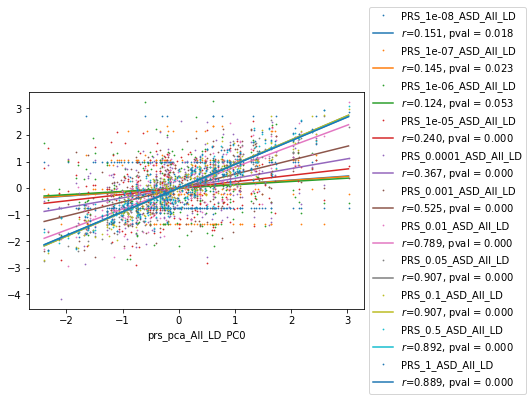

In [12]:
visualisation.simple_plots.plot_Linear_Reg(x='prs_pca_All_LD_PC0',
                                          y=[i for i in df.columns if 'PRS' in i],
                                          data=df,hide_CI=True)

In [20]:
dependentVar_cols = [
    i for i in df.columns
    if bool(re.search('AAL \d', i))
]
pca, X_pca, brain_loading_matrix = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df=df,
    dependentVar_cols=dependentVar_cols,
    scaling=True,n_components = .8)

In [21]:
df['Brain_PC4'] = X_pca[:,3]
df['PRS_pca'] = prs_pca

In [22]:
thresholds = [i for i in df.columns if 'PRS' in i]

european_volumetric_term_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
    df,
    thresholds=thresholds,
    cat_independentVar_cols=['Gender'],
    cont_independentVar_cols=['GA_vol','PMA_vol', '17 TOTAL BRAIN TISSUE VOLUME (mm3)']+ancestry,
    dependentVar_cols=X_pca)

100%|██████████████████████████████████████████████████████| 12/12 [00:00<00:00, 30.66it/s]


In [23]:
european_volumetric_term_mass_univariate.sort_values(by='PRS_pval')

,Connection,const_coef,const_pval,GA_vol_coef,GA_vol_pval,PMA_vol_coef,PMA_vol_pval,17 TOTAL BRAIN TISSUE VOLUME (mm3)_coef,17 TOTAL BRAIN TISSUE VOLUME (mm3)_pval,euro_Anc_PC1_coef,euro_Anc_PC1_pval,euro_Anc_PC2_coef,euro_Anc_PC2_pval,euro_Anc_PC3_coef,euro_Anc_PC3_pval,PRS_coef,PRS_pval,Gender_2.0_coef,Gender_2.0_pval,threshold
46,Dependent_Var_4,0.016075,0.881853,0.099827,0.309507,-0.756030,6.362826e-07,0.440584,6.301694e-04,0.141049,0.068407,-0.137220,0.072171,0.073869,0.341075,0.283809,0.000201,-0.033662,0.839324,PRS_0.01_ASD_All_LD
81,Dependent_Var_4,0.014535,0.893465,0.077444,0.429905,-0.727807,1.579974e-06,0.417740,1.220535e-03,0.165547,0.035196,-0.150488,0.051095,0.080693,0.299418,0.276079,0.000399,-0.030437,0.855116,PRS_pca
31,Dependent_Var_3,0.068947,0.567915,-0.192892,0.074890,0.385022,1.885848e-02,-0.225767,1.099461e-01,-0.087989,0.300908,0.015393,0.853774,-0.181904,0.034966,-0.249248,0.003768,-0.144377,0.440040,PRS_0.0001_ASD_All_LD
53,Dependent_Var_4,0.032373,0.767242,0.080165,0.418943,-0.724420,2.204162e-06,0.420438,1.273399e-03,0.143345,0.068497,-0.132836,0.086267,0.082395,0.294228,0.214225,0.005358,-0.067789,0.685909,PRS_0.05_ASD_All_LD
60,Dependent_Var_4,0.039530,0.717933,0.066231,0.504360,-0.715513,2.981409e-06,0.423074,1.205720e-03,0.148431,0.060695,-0.139640,0.073511,0.076465,0.331448,0.205325,0.007995,-0.082777,0.621328,PRS_0.1_ASD_All_LD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Dependent_Var_2,0.033420,0.785851,0.313828,0.005230,-0.618884,2.847374e-04,0.376702,1.002031e-02,0.084776,0.339205,0.072307,0.408441,0.112559,0.203737,0.005550,0.948760,-0.069981,0.710213,PRS_0.1_ASD_All_LD
23,Dependent_Var_2,0.034528,0.780918,0.313418,0.005440,-0.618676,2.878467e-04,0.376832,9.981135e-03,0.083643,0.341820,0.073007,0.398079,0.112699,0.202900,-0.004065,0.962421,-0.072302,0.705915,PRS_1e-05_ASD_All_LD
34,Dependent_Var_6,-0.010103,0.916028,-0.026033,0.761327,0.329127,1.154259e-02,-0.222340,4.774119e-02,0.039031,0.563005,0.114141,0.086186,0.052604,0.440602,0.000754,0.991115,0.021157,0.886618,PRS_0.0001_ASD_All_LD
17,Dependent_Var_3,0.010486,0.931071,-0.187522,0.089513,0.406322,1.486829e-02,-0.253013,7.806790e-02,-0.078022,0.367465,0.005267,0.950561,-0.159698,0.069853,-0.000420,0.996014,-0.021959,0.905832,PRS_1e-06_ASD_All_LD


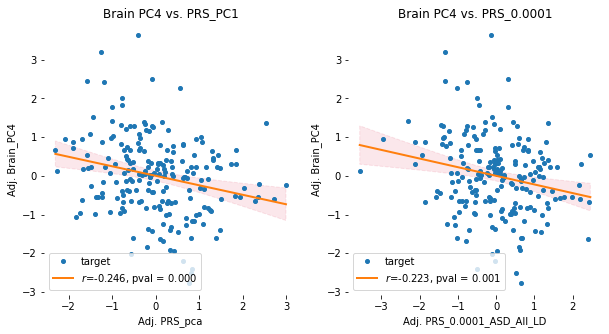

In [38]:
fig,axes = plt.subplots(1,2,figsize= (10,5))
visualisation.simple_plots.plot_Linear_Reg(
    x='PRS_pca',
    y='Brain_PC4',
    adjust_covar={
        'x': ancestry,
        'y':
        ['Gender', 'PMA_vol', 'GA_vol', '17 TOTAL BRAIN TISSUE VOLUME (mm3)']
    },
    data=df,
    markersize=8,linewidth=2,title='Brain PC4 vs. PRS_PC1',legend_loc='inside',
ax=axes[0])

visualisation.simple_plots.plot_Linear_Reg(
    x='PRS_0.0001_ASD_All_LD',
    y='Brain_PC4',
    adjust_covar={
        'x': ancestry,
        'y':
        ['Gender', 'PMA_vol', 'GA_vol', '17 TOTAL BRAIN TISSUE VOLUME (mm3)']
    },
    data=df,
    markersize=8,linewidth=2,title='Brain PC4 vs. PRS_0.0001',legend_loc='inside',ax=axes[1])

sns.despine(left=True, right=True, bottom=True, top=True)


In [16]:
# df[['ID','ID','Brain_PC4']].to_csv('../../dataset/genetic_dataset/pheno_cov_files/asd/phenotype_EUR.txt', index=False,header=['FID','IID','Brain_PC4'],sep='\t')
# df[[
#     'ID','ID','GA_vol', 'PMA_vol', 'Gender', 'euro_Anc_PC1', 'euro_Anc_PC2',
#     'euro_Anc_PC3', '17 TOTAL BRAIN TISSUE VOLUME (mm3)'
# ]].to_csv('../../dataset/genetic_dataset/pheno_cov_files/asd/covariate_EUR.txt', sep='\t', index=False, header=['FID','IID','GA','PMA','Gender','euro_Anc_PC1','euro_Anc_PC2','euro_Anc_PC3',
#                                                          'TBV'])

In [87]:
data_exploration.MassUnivariate.get_model_summary(df,
                                                 cat_independentVar_cols=['Gender'],
                                                  cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca']+ancestry,
                                                  dependentVar_cols=['Brain_PC4'])

,beta_coefs,pvalues,Rsquared
const,-0.149714,0.188305,0.007254
PMA_vol,0.335310,0.001304,0.044271
GA_vol,-0.017606,0.863669,0.000123
PRS_pca,-0.317139,0.000255,0.057718
euro_Anc_PC1,-0.108037,0.201616,0.006833
euro_Anc_PC2,0.061056,0.470973,0.002172
euro_Anc_PC3,-0.014488,0.860375,0.000129
Gender_2.0,0.317761,0.059187,0.014989


#### Mixed

In [88]:
df = mixed_volumetric_dataset_term.copy()
ancestry = [f'mixed_Anc_PC{i}' for i in range(1,6)]
dependentVar = [
    i for i in df.columns
    if bool(re.search('AAL \d',i))
]
# df = european_volumetric_dataset_term.copy()
# df = data_preprocessing.Volumes.Group_Imperial_volumes(df,grouping=None)
# df = data_exploration.MassUnivariate.remove_outliers(df,
#                                                     col=dependentVar,
#                                                      threshold=3,
#                                                     remove_schemes='percentage',
#                                                     percentage_of_outlier=0.1)
df = df.rename(columns = {'AAL 93':'AAL 109'})
df = df.rename(columns={i:i+'_ASD_All_LD' for i in df.columns if 'PRS' in i})

In [53]:
# # combined = df[[
# #     i for i in df.columns
# #     if bool(re.search('AAL \d', i))
# # ]].copy()
# combined = df[[i for i in df.columns if ('imputed' in i) and ('1e-08' not in i)]]
# correlation_matrix = np.corrcoef(combined, rowvar=False)
# _ = data_exploration.matSpDLite(correlation_matrix, alpha=0.05)

In [67]:
thresholds = [i for i in df.columns if 'PRS' in i]
dependentVar_cols=[i for i in df.columns if bool(re.search('AAL \d',i))]

mixed_volumetric_term_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
    df,
    thresholds=thresholds,
    cat_independentVar_cols=['Gender'],
    cont_independentVar_cols=['GA_vol', 'PMA_vol','17 ICV (all except bone)']+ancestry,
    dependentVar_cols=dependentVar_cols)

100%|███████████████████████████| 11/11 [00:01<00:00,  5.76it/s]


In [68]:
mixed_volumetric_term_mass_univariate.sort_values(by='PRS_pval')

,Connection,const_coef,const_pval,GA_vol_coef,GA_vol_pval,PMA_vol_coef,PMA_vol_pval,17 ICV (all except bone)_coef,17 ICV (all except bone)_pval,mixed_Anc_PC1_coef,...,mixed_Anc_PC3_pval,mixed_Anc_PC4_coef,mixed_Anc_PC4_pval,mixed_Anc_PC5_coef,mixed_Anc_PC5_pval,PRS_coef,PRS_pval,Gender_2.0_coef,Gender_2.0_pval,threshold
893,AAL 57,5007.933128,7.827948e-234,-66.187897,0.039940,152.405724,2.121389e-03,662.237249,3.525297e-39,-66.416490,...,0.223770,24.400907,0.382399,-13.482082,0.595820,-100.302197,0.000582,188.830784,0.000606,PRS_0.5_ASD_All_LD
986,AAL 57,5007.883858,8.754563e-234,-67.518051,0.036187,154.550306,1.857493e-03,660.847866,4.813856e-39,-65.800542,...,0.228247,24.225836,0.386068,-13.323679,0.600435,-99.461750,0.000655,188.937966,0.000606,PRS_1_ASD_All_LD
707,AAL 57,5008.699437,1.121925e-233,-75.153521,0.020125,149.836976,2.535171e-03,667.224942,1.832747e-39,-48.588865,...,0.163074,32.752493,0.242524,-19.155725,0.449427,-91.622098,0.000809,187.163725,0.000693,PRS_0.05_ASD_All_LD
112,AAL 20,3442.199069,1.389846e-213,-32.655249,0.225904,43.216323,2.977428e-01,477.836874,1.677219e-31,41.619894,...,0.905095,23.108084,0.324539,42.506014,0.046063,68.516222,0.000863,-33.166615,0.467306,PRS_1e-07_ASD_All_LD
800,AAL 57,5006.142608,1.246520e-233,-70.642141,0.028732,149.003173,2.697196e-03,662.937306,4.063979e-39,-51.839930,...,0.176559,27.823474,0.320213,-17.927490,0.479775,-90.419333,0.001009,192.725950,0.000476,PRS_0.1_ASD_All_LD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,AAL 86,10412.239862,1.178553e-251,28.105047,0.615969,74.374035,3.889057e-01,1413.807718,1.279662e-50,4.256178,...,0.174134,-69.445812,0.155198,8.214499,0.852398,0.107654,0.997969,-13.045927,0.890643,PRS_1e-07_ASD_All_LD
842,AAL 6,1649.045859,1.828351e-246,6.004439,0.520069,-32.281178,2.459458e-02,242.674840,7.952757e-53,-10.460717,...,0.578514,2.684671,0.740954,15.191818,0.040746,0.016093,0.998467,-6.088799,0.700415,PRS_0.5_ASD_All_LD
648,AAL 91,9483.958546,1.332670e-232,-76.181821,0.216747,696.893640,2.104740e-12,837.118850,2.095868e-21,-14.327445,...,0.693212,60.095768,0.260981,-71.340255,0.140655,-0.076032,0.998735,2.683383,0.979498,PRS_0.01_ASD_All_LD
253,AAL 68,7874.479743,2.603687e-244,83.390996,0.068185,-26.469608,7.046345e-01,1069.912096,3.114164e-46,24.764073,...,0.754777,2.703694,0.945646,9.242241,0.796785,0.024167,0.999434,-149.512949,0.053391,PRS_1e-06_ASD_All_LD


In [89]:
# prs_lds = ['All_LD','AllLDimputed','Euro_LD','EuroLDimputed']
prs_lds = ['All_LD']
for threshold in prs_lds:
    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df = df,
    dependentVar_cols=[i for i in df.columns if threshold in i],
    scaling=True,
    n_components=1)
    for i in range(prs_pca.shape[1]):
        df[f'prs_pca_{threshold}_PC{i}'] = prs_pca[:,i]

In [90]:
dependentVar_cols = [
    i for i in df.columns
    if bool(re.search('AAL \d', i))
]
pca, X_pca, brain_loading_matrix = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df=df,
    dependentVar_cols=dependentVar_cols,
    scaling=True,n_components = .8)

In [91]:
df['Brain_PC4'] = X_pca[:,3]
df['PRS_pca'] = prs_pca

In [72]:
thresholds = [i for i in df.columns if 'PRS' in i]

mixed_volumetric_term_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
    df,
    thresholds=thresholds,
    cat_independentVar_cols=['Gender'],
    cont_independentVar_cols=['GA_vol','PMA_vol', '17 TOTAL BRAIN TISSUE VOLUME (mm3)']+ancestry,
    dependentVar_cols=X_pca)

100%|███████████████████████████| 12/12 [00:00<00:00, 34.90it/s]


In [73]:
mixed_volumetric_term_mass_univariate.sort_values(by='PRS_pval')

,Connection,const_coef,const_pval,GA_vol_coef,GA_vol_pval,PMA_vol_coef,PMA_vol_pval,17 TOTAL BRAIN TISSUE VOLUME (mm3)_coef,17 TOTAL BRAIN TISSUE VOLUME (mm3)_pval,mixed_Anc_PC1_coef,...,mixed_Anc_PC3_pval,mixed_Anc_PC4_coef,mixed_Anc_PC4_pval,mixed_Anc_PC5_coef,mixed_Anc_PC5_pval,PRS_coef,PRS_pval,Gender_2.0_coef,Gender_2.0_pval,threshold
27,Dependent_Var_3,-0.028618,0.795606,-0.164028,0.102579,0.688185,0.000016,-0.387215,4.347013e-03,-0.016827,...,0.381154,0.108594,0.213178,-0.130277,0.098342,-0.259126,0.000824,0.062256,0.727617,PRS_0.0001_ASD_All_LD
9,Dependent_Var_3,-0.077567,0.482332,-0.156411,0.122974,0.652795,0.000054,-0.379140,5.767829e-03,-0.006726,...,0.405495,0.100013,0.255824,-0.126602,0.111977,-0.195334,0.010841,0.168741,0.340645,PRS_1e-07_ASD_All_LD
15,Dependent_Var_3,-0.082115,0.458009,-0.163448,0.108210,0.678369,0.000027,-0.385330,5.098599e-03,-0.007022,...,0.358037,0.088065,0.318370,-0.143722,0.071964,-0.176122,0.020581,0.178637,0.314063,PRS_1e-06_ASD_All_LD
71,Dependent_Var_5,0.026433,0.795181,0.294322,0.001758,-0.566139,0.000129,0.333139,8.136793e-03,-0.061623,...,0.121903,-0.131816,0.104016,-0.046483,0.526060,-0.184019,0.020950,-0.057503,0.725366,PRS_pca
3,Dependent_Var_3,-0.081158,0.463677,-0.135208,0.184957,0.646372,0.000071,-0.364133,8.580206e-03,-0.021076,...,0.332422,0.080136,0.365448,-0.142723,0.074160,-0.170867,0.026160,0.176554,0.320195,PRS_1e-08_ASD_All_LD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Dependent_Var_0,0.178398,0.092025,0.030527,0.751868,-0.066433,0.659950,-8.047796,9.414294e-149,0.038053,...,0.819149,0.037068,0.658445,-0.109584,0.150122,-0.010805,0.895389,-0.388094,0.022935,PRS_pca
34,Dependent_Var_4,-0.002514,0.982699,-0.009132,0.931504,-0.251816,0.129823,0.149906,2.933025e-01,0.016491,...,0.814209,-0.030128,0.745060,0.035796,0.668660,0.006668,0.933419,0.005469,0.976570,PRS_0.001_ASD_All_LD
13,Dependent_Var_1,0.143776,0.283251,0.181000,0.141425,-0.718996,0.000224,0.478716,4.053812e-03,0.023167,...,0.208518,0.077874,0.465716,-0.051144,0.595589,-0.004827,0.957943,-0.312775,0.145708,PRS_1e-06_ASD_All_LD
7,Dependent_Var_1,0.143602,0.283957,0.181319,0.140403,-0.718036,0.000241,0.477770,4.156839e-03,0.022869,...,0.207573,0.078046,0.464433,-0.051095,0.596086,0.002990,0.974173,-0.312398,0.146385,PRS_1e-07_ASD_All_LD


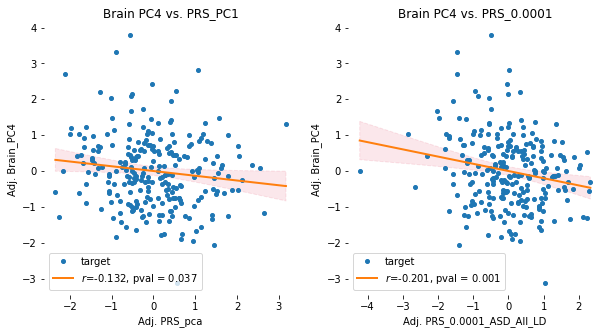

In [74]:
fig,axes = plt.subplots(1,2,figsize= (10,5))
visualisation.simple_plots.plot_Linear_Reg(
    x='PRS_pca',
    y='Brain_PC4',
    adjust_covar={
        'x': ancestry,
        'y':
        ['Gender', 'PMA_vol', 'GA_vol', '17 TOTAL BRAIN TISSUE VOLUME (mm3)']
    },
    data=df,
    markersize=8,linewidth=2,title='Brain PC4 vs. PRS_PC1',legend_loc='inside',
ax=axes[0])

visualisation.simple_plots.plot_Linear_Reg(
    x='PRS_0.0001_ASD_All_LD',
    y='Brain_PC4',
    adjust_covar={
        'x': ancestry,
        'y':
        ['Gender', 'PMA_vol', 'GA_vol', '17 TOTAL BRAIN TISSUE VOLUME (mm3)']
    },
    data=df,
    markersize=8,linewidth=2,title='Brain PC4 vs. PRS_0.0001',legend_loc='inside',ax=axes[1])

sns.despine(left=True, right=True, bottom=True, top=True)


In [16]:
# df[['ID','ID','Brain_PC4']].to_csv('../../dataset/genetic_dataset/pheno_cov_files/asd/phenotype_EUR.txt', index=False,header=['FID','IID','Brain_PC4'],sep='\t')
# df[[
#     'ID','ID','GA_vol', 'PMA_vol', 'Gender', 'euro_Anc_PC1', 'euro_Anc_PC2',
#     'euro_Anc_PC3', '17 TOTAL BRAIN TISSUE VOLUME (mm3)'
# ]].to_csv('../../dataset/genetic_dataset/pheno_cov_files/asd/covariate_EUR.txt', sep='\t', index=False, header=['FID','IID','GA','PMA','Gender','euro_Anc_PC1','euro_Anc_PC2','euro_Anc_PC3',
#                                                          'TBV'])

In [79]:
data_exploration.MassUnivariate.get_model_summary(df,
                                                 cat_independentVar_cols=['Gender'],
                                                  cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca']+ancestry,
                                                  dependentVar_cols=['Brain_PC4'])

,beta_coefs,pvalues,Rsquared
const,-0.186286,0.077033,0.011194
PMA_vol,0.326291,0.000825,0.040730
GA_vol,-0.054697,0.570903,0.001143
PRS_pca,-0.185198,0.036043,0.015778
mixed_Anc_PC1,-0.135951,0.161499,0.007001
mixed_Anc_PC2,0.021895,0.778766,0.000281
mixed_Anc_PC3,-0.032148,0.680927,0.000602
mixed_Anc_PC4,0.102150,0.255495,0.004612
mixed_Anc_PC5,-0.156592,0.052371,0.013494
Gender_2.0,0.405253,0.010541,0.023589


### Anterior vs. posterior regions

#### European AAL

In [9]:
df = european_volumetric_dataset_term.copy()
ancestry = [f'euro_Anc_PC{i}' for i in range(1,4)]
dependentVar = [
    i for i in european_volumetric_dataset_term.columns
    if bool(re.search('AAL \d',i))
]
df = european_volumetric_dataset_term.copy()
dependentVar = [
    i for i in df.columns
    if bool(re.search('Imperial \d',i))
]
df = data_exploration.MassUnivariate.remove_outliers(df,
                                                    col=dependentVar,
                                                     threshold=3,
                                                    remove_schemes='percentage',
                                                    percentage_of_outlier=0.1)
df = df.rename(columns = {'AAL 93':'AAL 109'})
df = df.rename(columns={i:i+'_euro_ld_old' for i in df.columns if 'PRS' in i})

batch2_euro_ld = genetic_file_preprocess.Cohort.preprocess_PRSice_PRS_Anc_files(file_path='../../dataset/PRS/asd/ASD_nodups_euro_batch2_genotyped.gwas.all_score',column_prefix='euro_ld_no_dups_gen')
batch2_euro_ld_imputed = genetic_file_preprocess.Cohort.preprocess_PRSice_PRS_Anc_files(file_path='../../dataset/PRS/asd/imputed_data/ASD_euro_batch2_imputed.gwas.all.score',column_prefix='euro_ld_no_dups_imputed')

df = df.merge(batch2_euro_ld,left_on='ID',right_index=True)
df = df.merge(batch2_euro_ld_imputed,left_on='ID',right_index=True)

prs_lds = ['euro_ld_old','euro_ld_no_dups_imputed','euro_ld_no_dups_gen']
for threshold in prs_lds:
    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df = df,
    dependentVar_cols=[i for i in df.columns if threshold in i],
    scaling=True,
    n_components=1)
    for i in range(prs_pca.shape[1]):
        df[f'prs_pca_{threshold}_PC{i}'] = prs_pca[:,i]

dependentVar_cols = [
    i for i in df.columns
    if bool(re.search('AAL \d', i))
]
pca, X_pca, brain_loading_matrix = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df=df,
    dependentVar_cols=dependentVar_cols,
    scaling=True,n_components = .8)

df['Brain_PC5'] = X_pca[:,4]
df['PRS_pca'] = prs_pca


In [470]:
df.shape

(243, 4557)

In [497]:
european_volumetric_term_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(df,
                                                                                     thresholds=[f'prs_pca_{threshold}_PC{0}' for threshold in prs_lds],
                                                                                     cat_independentVar_cols=['Gender'],
                                                                                    cont_independentVar_cols=['PMA_vol','GA_vol','17 TOTAL BRAIN TISSUE VOLUME (mm3)']+ancestry,
                                                                                    dependentVar_cols=dependentVar_cols)

100%|██████████| 3/3 [00:00<00:00,  3.20it/s]


In [498]:
european_volumetric_term_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(df,
                                                                                     thresholds=[i for i in df.columns if 'euro_ld_no_dups_gen' in i],
                                                                                     cat_independentVar_cols=['Gender'],
                                                                                    cont_independentVar_cols=['PMA_vol','GA_vol','17 TOTAL BRAIN TISSUE VOLUME (mm3)']+ancestry,
                                                                                    dependentVar_cols=dependentVar_cols)

100%|████████| 12/12 [00:02<00:00,  4.23it/s]


In [503]:
european_volumetric_term_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(df,
                                                                                     thresholds=['euro_ld_no_dups_genPt_1'],
                                                                                     cat_independentVar_cols=['Gender'],
                                                                                    cont_independentVar_cols=['PMA_vol','GA_vol','17 TOTAL BRAIN TISSUE VOLUME (mm3)']+ancestry,
                                                                                    dependentVar_cols=dependentVar_cols)

100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


In [504]:
european_volumetric_term_mass_univariate.sort_values(by='PRS_pval')

,Connection,const_coef,const_pval,PMA_vol_coef,PMA_vol_pval,GA_vol_coef,GA_vol_pval,17 TOTAL BRAIN TISSUE VOLUME (mm3)_coef,17 TOTAL BRAIN TISSUE VOLUME (mm3)_pval,euro_Anc_PC1_coef,euro_Anc_PC1_pval,euro_Anc_PC2_coef,euro_Anc_PC2_pval,euro_Anc_PC3_coef,euro_Anc_PC3_pval,PRS_coef,PRS_pval,Gender_2.0_coef,Gender_2.0_pval,threshold
3,AAL 4,4963.236279,7.957728e-215,13.243596,0.808707,-20.509680,0.575157,724.686038,2.297988e-37,50.074827,0.083447,-37.774765,0.189289,6.870194,0.812506,102.331067,0.000371,29.467321,0.633929,euro_ld_no_dups_genPt_1
75,AAL 76,598.196960,4.704711e-251,-3.225330,0.483234,1.339931,0.663067,41.321470,3.536649e-21,-2.916067,0.229649,-1.149369,0.634120,-0.144961,0.952518,6.411972,0.007598,-5.132426,0.324149,euro_ld_no_dups_genPt_1
68,AAL 69,1371.001423,5.494319e-168,-25.839565,0.287016,0.488478,0.975961,193.485605,1.289977e-17,3.837852,0.763934,-13.846225,0.277290,16.776863,0.191965,31.700184,0.012225,17.261028,0.529114,euro_ld_no_dups_genPt_1
56,AAL 57,5025.911709,9.974659e-223,152.928682,0.003082,-69.905937,0.042056,619.472547,6.315381e-33,-34.902568,0.196671,33.241746,0.216972,-3.825753,0.887755,-66.682966,0.012564,253.766851,0.000017,euro_ld_no_dups_genPt_1
24,AAL 25,1328.062151,7.746530e-180,-63.487229,0.002520,21.552490,0.122433,251.816591,6.374547e-33,8.546210,0.436264,-32.290310,0.003414,6.723556,0.541902,26.148056,0.016018,29.880580,0.205028,euro_ld_no_dups_genPt_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,AAL 54,1546.341526,3.202358e-181,-23.625323,0.323288,-2.070726,0.896893,252.885698,4.130730e-27,-8.719921,0.488971,12.775338,0.309114,0.722542,0.954456,0.647012,0.958345,-1.988068,0.941354,euro_ld_no_dups_genPt_1
2,AAL 3,4648.751430,1.907430e-228,-53.583574,0.231633,-28.763089,0.336728,716.977476,4.676345e-48,2.965866,0.899900,-18.890251,0.421548,-13.011366,0.582841,-1.114593,0.961663,47.978685,0.343354,euro_ld_no_dups_genPt_1
47,AAL 48,3690.899699,5.659217e-220,-95.197831,0.014369,60.516103,0.019895,539.937374,3.589115e-40,-13.657407,0.502744,-27.071443,0.182965,-12.413904,0.544162,-0.646923,0.974238,76.497829,0.081021,euro_ld_no_dups_genPt_1
84,AAL 85,9787.229295,9.573918e-238,-56.643560,0.509576,114.872858,0.046330,1359.589725,2.526264e-47,-30.685016,0.497950,-49.688792,0.270978,-35.912623,0.429792,-0.421915,0.992436,144.661908,0.137167,euro_ld_no_dups_genPt_1


In [430]:
to_plot = european_volumetric_term_mass_univariate[european_volumetric_term_mass_univariate['Connection']=='Dependent_Var_4'].copy()

In [431]:
to_plot

,Connection,const_coef,const_pval,PMA_vol_coef,PMA_vol_pval,GA_vol_coef,GA_vol_pval,17 TOTAL BRAIN TISSUE VOLUME (mm3)_coef,17 TOTAL BRAIN TISSUE VOLUME (mm3)_pval,euro_Anc_PC1_coef,euro_Anc_PC1_pval,euro_Anc_PC2_coef,euro_Anc_PC2_pval,euro_Anc_PC3_coef,euro_Anc_PC3_pval,PRS_coef,PRS_pval,Gender_2.0_coef,Gender_2.0_pval,threshold
4,Dependent_Var_4,-0.014751,0.892110,-0.679996,0.000006,0.021709,0.825391,0.398673,0.001871,0.163389,0.037717,-0.173542,0.024590,0.083836,0.280995,0.318273,0.000049,0.030902,0.853553,prs_pca_euro_ld_old_PC0
11,Dependent_Var_4,-0.011442,0.916359,-0.689062,0.000005,0.024201,0.806205,0.406084,0.001570,0.155746,0.047336,-0.166298,0.031062,0.085835,0.270731,0.306311,0.000084,0.023969,0.886310,prs_pca_euro_ld_no_dups_imputed_PC0
18,Dependent_Var_4,-0.018085,0.866666,-0.695401,0.000003,0.034906,0.720638,0.402574,0.001524,0.151816,0.049487,-0.179404,0.019034,0.088114,0.252748,0.353741,0.000005,0.037885,0.819227,prs_pca_euro_ld_no_dups_gen_PC0


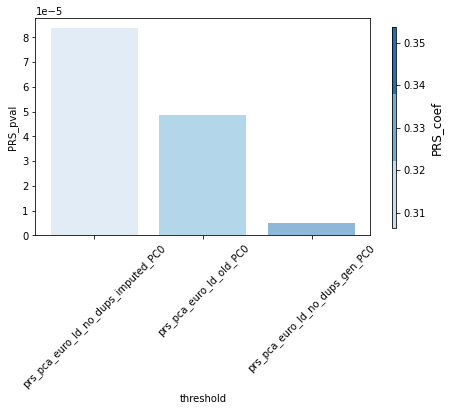

In [432]:
visualisation.simple_plots.Bar(x='threshold',
                              y='PRS_pval',colorby='PRS_coef',cmap='Blues',cmap_reversed=False,
                              data=to_plot,rotation_x=45,alpha=0.5)

<AxesSubplot:title={'center':'AAL atlas(93)'}, xlabel='Adj. PRS PC1', ylabel='Adj. Brain_PC5'>

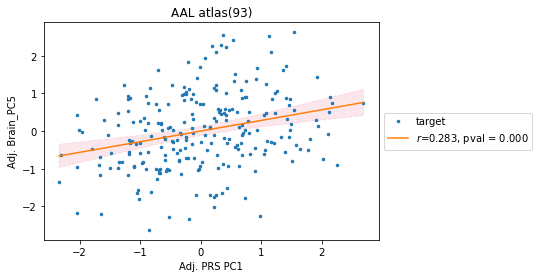

In [433]:
visualisation.simple_plots.plot_Linear_Reg(y=X_pca[:,4],
                                           x='prs_pca_euro_ld_no_dups_gen_PC0',
                                           adjust_covar={'y':['Gender','PMA_vol','GA_vol','17 TOTAL BRAIN TISSUE VOLUME (mm3)'],
                                                        'x':ancestry},
                                           ylabel='Brain_PC5',
                                           xlabel='PRS PC1',
                                           data=df,markersize=5,title='AAL atlas(93)')

In [10]:
prs_loading_matrix = df[[f'AAL {i}' for i in list(range(1, 93)) + [109]]].apply(
    lambda x: np.corrcoef(x.values, df['prs_pca_euro_ld_no_dups_gen_PC0'].values)[0, 1],
    axis=0)

In [11]:
brain_loading_matrix = df[[f'AAL {i}' for i in list(range(1, 93)) + [109]]].apply(
    lambda x: np.corrcoef(x.values, df['Brain_PC5'])[0, 1],
    axis=0)

<AxesSubplot:>

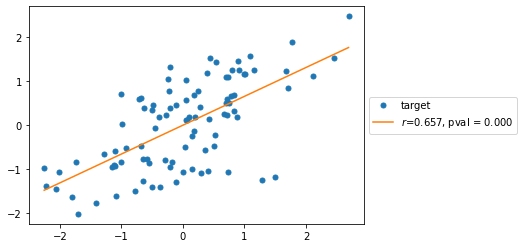

In [23]:
visualisation.simple_plots.plot_Linear_Reg(prs_loading_matrix.values,brain_loading_matrix.values,'.',hide_CI=True,markersize=10)

In [24]:
# #see the loading matrix of PC4
# fig, ax = plt.subplots(1, 1, figsize=(20, 16))
# visualisation.visualise_heatmap(pd.DataFrame(brain_loading_matrix[3]),
#                                 ax,
#                                 xlabel=['brain PC4'],
#                                 ylabel=brain_loading_matrix.index.tolist())

In [437]:
plot_labels = [int(i.replace('AAL ','')) for i in brain_loading_matrix.index]
brain_plot_value_values = brain_loading_matrix.values
brain_plot_values = dict(zip(plot_labels,brain_plot_value_values)) 

prs_plot_value_values = prs_loading_matrix.values
prs_plot_values = dict(zip(plot_labels,prs_plot_value_values)) 

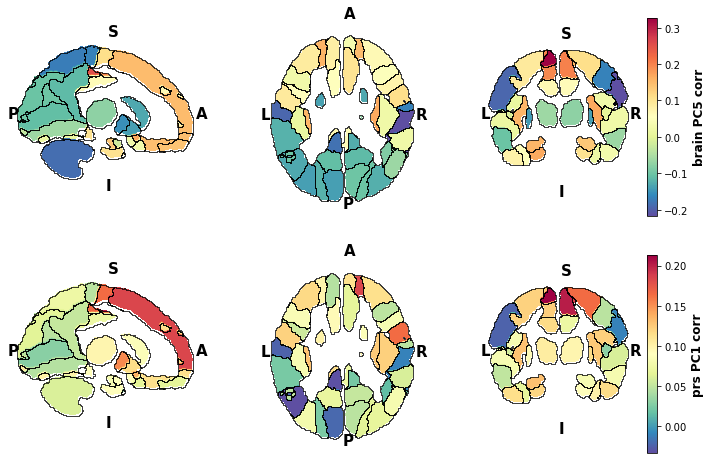

In [438]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
_, map_view_dict = visualisation.Brainmap.plot_segmentation(
    map_view=['sagittal', 'axial', 'coronal'],
    atlas_slice=120,
    plot_values=brain_plot_values,
    colorbar=True,
    atlas_file='../../dataset/visualise/AAL/KANA0.53_in_extdhcp40wk.nii.gz',
    cb_orientation='vertical',
    cmap_reversed=True,
    axes=ax[0],
    fig=fig,
    cb_title='brain PC5 corr')

_, map_view_dict = visualisation.Brainmap.plot_segmentation(
    map_view=['sagittal', 'axial', 'coronal'],
    atlas_slice=120,
    plot_values=prs_plot_values,
    colorbar=True,
    atlas_file='../../dataset/visualise/AAL/KANA0.53_in_extdhcp40wk.nii.gz',
    cb_orientation='vertical',
    cmap_reversed=True,
    axes=ax[1],
    fig=fig,
    cb_title='prs PC1 corr')
# fig.savefig('./brain_plots.png')

In [116]:
ROIs_coord = visualisation.Brainmap.get_ROIs_coordinates('../../dataset/visualise/AAL/KANA0.53_in_extdhcp40wk.nii.gz')

In [472]:
standardized_ROIs_coord = ROIs_coord.copy()
standardized_ROIs_coord[['X','Y','Z']] = StandardScaler().fit_transform(ROIs_coord[['X','Y','Z']])

In [473]:
standardized_ROIs_coord[standardized_ROIs_coord['Y']<0]
posterior_labels = standardized_ROIs_coord.loc[standardized_ROIs_coord['Y']<=0,'Label'].to_list()
anterior_labels = standardized_ROIs_coord.loc[standardized_ROIs_coord['Y']>0,'Label'].to_list()

In [474]:
df['Anterior_volumes'] = df[[f'AAL {int(i)}' for i in anterior_labels if f'AAL {int(i)}' in df.columns]].sum(axis=1)
df['Posterior_volumes'] = df[[f'AAL {int(i)}' for i in posterior_labels  if f'AAL {int(i)}' in df.columns]].sum(axis=1)

In [475]:
_, anterior_posterior = data_exploration.MassUnivariate.mass_univariate(df,
                                               cat_independentVar_cols=['Gender'],
                                               cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca',
                                                                           '17 TOTAL BRAIN TISSUE VOLUME (mm3)']+ancestry,
                                                  dependentVar_cols=['Anterior_volumes','Posterior_volumes'],
                                                                       scaling='both')

In [476]:
anterior_posterior

,const_coef,const_pval,PMA_vol_coef,PMA_vol_pval,GA_vol_coef,GA_vol_pval,PRS_pca_coef,PRS_pca_pval,17 TOTAL BRAIN TISSUE VOLUME (mm3)_coef,17 TOTAL BRAIN TISSUE VOLUME (mm3)_pval,euro_Anc_PC1_coef,euro_Anc_PC1_pval,euro_Anc_PC2_coef,euro_Anc_PC2_pval,euro_Anc_PC3_coef,euro_Anc_PC3_pval,Gender_2.0_coef,Gender_2.0_pval
Anterior_volumes,-0.035503,0.076785,-0.005271,0.845412,-0.030009,0.098628,0.039611,0.005178,0.987410,8.886430e-112,0.021773,0.128477,-0.031000,0.028936,0.007661,0.591769,0.074373,0.016301
Posterior_volumes,-0.032415,0.057425,0.085683,0.000237,0.004714,0.759504,-0.026616,0.026615,0.929816,4.207554e-121,-0.012460,0.305403,0.006325,0.598237,-0.017107,0.159626,0.067904,0.009937


In [477]:
data_exploration.MassUnivariate.get_model_summary(df,
                                                 cat_independentVar_cols=['Gender'],
                                                  cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca',
                                                                           '17 TOTAL BRAIN TISSUE VOLUME (mm3)']+ancestry,
                                                  dependentVar_cols=['Anterior_volumes'],scaling='both')

,beta_coefs,pvalues,Rsquared
const,-0.035503,7.678470e-02,0.404730
PMA_vol,-0.005271,8.454125e-01,0.000007
GA_vol,-0.030009,9.862771e-02,0.000505
PRS_pca,0.039611,5.178345e-03,0.001463
17 TOTAL BRAIN TISSUE VOLUME (mm3),0.987410,8.886430e-112,0.329942
euro_Anc_PC1,0.021773,1.284765e-01,0.000427
euro_Anc_PC2,-0.031000,2.893555e-02,0.000887
euro_Anc_PC3,0.007661,5.917685e-01,0.000053
Gender_2.0,0.074373,1.630081e-02,0.001075


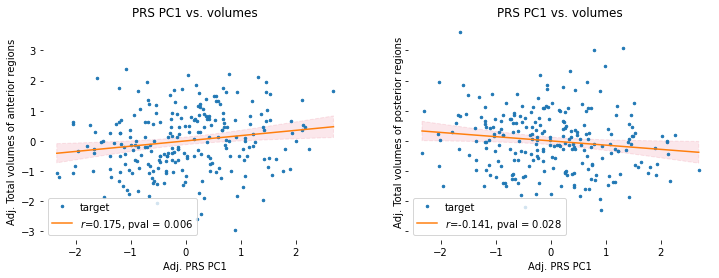

In [481]:
fig,ax = plt.subplots(1,2,figsize=(12,4),sharey=True)
visualisation.simple_plots.plot_Linear_Reg(y='Anterior_volumes',
                              x='PRS_pca',
                              data=df,
                              adjust_covar={'x':ancestry,
                                           'y':['Gender','GA_vol','PMA_vol','17 TOTAL BRAIN TISSUE VOLUME (mm3)']},
                              markersize=5,ax=ax[0],legend_loc='inside',
                             ylabel='Total volumes of anterior regions',
                              xlabel='PRS PC1',
                             title='PRS PC1 vs. volumes')
visualisation.simple_plots.plot_Linear_Reg(y='Posterior_volumes',
                              x='PRS_pca',
                              data=df,
                              adjust_covar={'x':ancestry,
                                           'y':['Gender','GA_vol','PMA_vol','17 TOTAL BRAIN TISSUE VOLUME (mm3)']},
                              markersize=5,ax=ax[1],legend_loc='inside',
                             ylabel='Total volumes of posterior regions',
                              xlabel='PRS PC1',
                             title='PRS PC1 vs. volumes')
sns.despine(bottom=True,left=True)
# fig.savefig('./PCA_withbrainpos.png')

#### European Imperial

In [482]:
df = european_volumetric_dataset_term.copy()
ancestry = [f'euro_Anc_PC{i}' for i in range(1,4)]
df = data_preprocessing.Volumes.Group_Imperial_volumes(df,grouping='segmented',remove_duplicated=True)
dependentVar = [
    i for i in df.columns
    if bool(re.search('Imperial \d',i))
]
df = data_exploration.MassUnivariate.remove_outliers(df,
                                                    col=dependentVar,
                                                     threshold=3,
                                                    remove_schemes='percentage',
                                                    percentage_of_outlier=0.1)
df = df.rename(columns = {'AAL 93':'AAL 109'})
df = df.rename(columns={i:i+'_euro_ld_old' for i in df.columns if 'PRS' in i})

batch2_euro_ld = genetic_file_preprocess.Cohort.preprocess_PRSice_PRS_Anc_files(file_path='../../dataset/PRS/asd/ASD_nodups_euro_batch2_genotyped.gwas.all_score',column_prefix='euro_ld_no_dups_gen')
batch2_euro_ld_imputed = genetic_file_preprocess.Cohort.preprocess_PRSice_PRS_Anc_files(file_path='../../dataset/PRS/asd/imputed_data/ASD_euro_batch2_imputed.gwas.all.score',column_prefix='euro_ld_no_dups_imputed')

df = df.merge(batch2_euro_ld,left_on='ID',right_index=True)
df = df.merge(batch2_euro_ld_imputed,left_on='ID',right_index=True)

prs_lds = ['euro_ld_old','euro_ld_no_dups_imputed','euro_ld_no_dups_gen']
for threshold in prs_lds:
    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df = df,
    dependentVar_cols=[i for i in df.columns if threshold in i],
    scaling=True,
    n_components=1)
    for i in range(prs_pca.shape[1]):
        df[f'prs_pca_{threshold}_PC{i}'] = prs_pca[:,i]

dependentVar_cols = [
    i for i in df.columns
    if bool(re.search('Imperial \d', i))
]
pca, X_pca, brain_loading_matrix = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df=df,
    dependentVar_cols=dependentVar_cols,
    scaling=True,n_components = .8)

df['Brain_PC5'] = X_pca[:,4]
df['PRS_pca'] = prs_pca


In [483]:
WM_labels = data_preprocessing.Volumes.extract_WM_Imperial(df[[i for i in df.columns if bool(re.search('Imperial \d',i))]]).columns.tolist()
GM_labels = data_preprocessing.Volumes.extract_GM_Imperial(df[[i for i in df.columns if bool(re.search('Imperial \d',i))]]).columns.tolist()
DGM_labels = data_preprocessing.Volumes.extract_deepGM_Imperial(df[[i for i in df.columns if bool(re.search('Imperial \d',i))]]).columns.tolist()
bs_labels = ['Imperial 19']
cerebellum_labels = ['Imperial 17','Imperial 18']
ventricle_labels = [f'Imperial {i}' for i in range(49,51)]
# cor_labels = WM_labels+GM_labels+DGM_labels + bs_labels + cerebellum_labels + ventricle_labels
cor_labels = GM_labels + WM_labels + cerebellum_labels
# cor_labels = WM_labels
# cor_labels = GM_labels

In [484]:
pca, X_pca, brain_loading_matrix = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df=df,
    dependentVar_cols=[i for i in df.columns if i in cor_labels],
    scaling=True,n_components = .8)
df['Brain_PC5'] = X_pca[:,4]

In [485]:
mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(df,
                                                                                                         thresholds=[i for i in df.columns if 'euro_ld_no_dups_gen' in i],
                                               cat_independentVar_cols=['Gender'],
                                               cont_independentVar_cols=['GA_vol','PMA_vol','Intracranial_Imperial','Total_Brain_Volume_Imperial']+ancestry,
                                               dependentVar_cols=X_pca)

100%|████████| 12/12 [00:00<00:00, 32.23it/s]


In [461]:
mass_univariate.sort_values(by='PRS_pval')

,Connection,const_coef,const_pval,GA_vol_coef,GA_vol_pval,PMA_vol_coef,PMA_vol_pval,Intracranial_Imperial_coef,Intracranial_Imperial_pval,Total_Brain_Volume_Imperial_coef,...,euro_Anc_PC1_pval,euro_Anc_PC2_coef,euro_Anc_PC2_pval,euro_Anc_PC3_coef,euro_Anc_PC3_pval,PRS_coef,PRS_pval,Gender_2.0_coef,Gender_2.0_pval,threshold
59,Dependent_Var_4,-0.034502,0.717987,-0.068007,0.430490,0.184657,1.527047e-01,-0.448704,0.133192,0.245710,...,0.112946,-0.061615,0.359833,0.026068,0.701214,0.175556,0.009267,0.072276,0.624312,prs_pca_euro_ld_no_dups_gen_PC0
24,Dependent_Var_4,-0.043101,0.656358,-0.077327,0.372029,0.204341,1.155629e-01,-0.382351,0.201946,0.178489,...,0.205103,-0.040901,0.540438,0.037086,0.588388,0.140746,0.039154,0.090289,0.549048,euro_ld_no_dups_genPt_0.0001
54,Dependent_Var_4,-0.018181,0.849393,-0.081051,0.349624,0.184684,1.552593e-01,-0.422611,0.159077,0.224761,...,0.143132,-0.059200,0.384396,0.016272,0.812270,0.135074,0.045161,0.038086,0.796153,euro_ld_no_dups_genPt_1
49,Dependent_Var_4,-0.017498,0.854990,-0.082717,0.339920,0.189163,1.453215e-01,-0.426039,0.155910,0.225475,...,0.153269,-0.059718,0.380824,0.016959,0.804465,0.133776,0.046916,0.036655,0.803638,euro_ld_no_dups_genPt_0.5
39,Dependent_Var_4,-0.025086,0.793828,-0.073005,0.400204,0.188835,1.461795e-01,-0.446045,0.138522,0.249695,...,0.137552,-0.048905,0.467389,0.030188,0.659037,0.130219,0.051619,0.052551,0.722664,euro_ld_no_dups_genPt_0.05
29,Dependent_Var_4,-0.029007,0.763031,-0.065799,0.449810,0.191143,1.413742e-01,-0.418875,0.163049,0.227206,...,0.166433,-0.038118,0.568504,0.030577,0.655072,0.126681,0.056724,0.060765,0.682713,euro_ld_no_dups_genPt_0.001
34,Dependent_Var_4,-0.026248,0.784752,-0.065026,0.455452,0.170810,1.909949e-01,-0.423572,0.158618,0.238797,...,0.163506,-0.044930,0.503228,0.022015,0.747711,0.125743,0.059149,0.054985,0.710863,euro_ld_no_dups_genPt_0.01
44,Dependent_Var_4,-0.017923,0.851793,-0.074254,0.392785,0.188959,1.465057e-01,-0.428763,0.154245,0.234185,...,0.150476,-0.052114,0.441879,0.019924,0.771337,0.118555,0.076111,0.037546,0.799387,euro_ld_no_dups_genPt_0.1
19,Dependent_Var_4,-0.031401,0.745751,-0.069408,0.426237,0.191775,1.410684e-01,-0.398288,0.185402,0.208415,...,0.169173,-0.025131,0.708002,0.031171,0.649808,0.105677,0.115589,0.065779,0.661304,euro_ld_no_dups_genPt_1e-05
9,Dependent_Var_4,-0.015934,0.868401,-0.075960,0.383239,0.214499,1.017992e-01,-0.416462,0.167193,0.206537,...,0.150755,-0.034797,0.603741,0.037108,0.591402,0.093258,0.166505,0.033380,0.821659,euro_ld_no_dups_genPt_1e-07


<AxesSubplot:title={'center':'DrawEM-atlas(41)'}, xlabel='Adj. PRS PC1', ylabel='Adj. Brain PC5'>

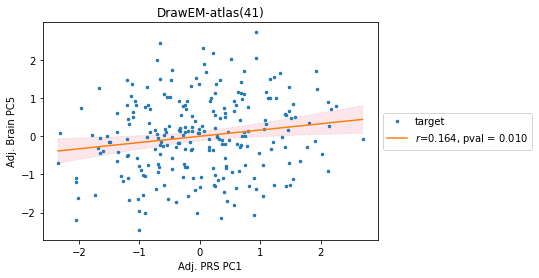

In [462]:
visualisation.simple_plots.plot_Linear_Reg(x='PRS_pca',
                                          y=X_pca[:,4],
                                           adjust_covar={'x':ancestry,
                                                        'y':['Gender','GA_vol','PMA_vol','Intracranial_Imperial',
                                                            'Total_Brain_Volume_Imperial']},
                                          data=df,markersize=5,xlabel='PRS PC1',ylabel='Brain PC5',title='DrawEM-atlas(41)')

In [463]:
prs_loading_matrix = df[[i for i in WM_labels if bool(re.search('Imperial \d',i))]].apply(
    lambda x: np.corrcoef(x.values, df[f'prs_pca_{threshold}_PC0'].values)[0, 1],
    axis=0)

prs_loading_matrix = df[[i for i in GM_labels if bool(re.search('Imperial \d',i))]].apply(
    lambda x: np.corrcoef(x.values, df[f'prs_pca_{threshold}_PC0'].values)[0, 1],
    axis=0)

prs_loading_matrix = df[[i for i in cor_labels if bool(re.search('Imperial \d',i))]].apply(
    lambda x: np.corrcoef(x.values, df[f'prs_pca_{threshold}_PC0'].values)[0, 1],
    axis=0)

In [464]:
# prs_loading_matrix = df[[i for i in cor_labels if bool(re.search('Imperial \d',i))]].apply(
#     lambda x: np.corrcoef(x.values, df['prs_pca_SCZ_PC0'].values)[0, 1],
#     axis=0)

In [465]:
brain_loading_matrix = df[[i for i in cor_labels if bool(re.search('Imperial \d',i))]].apply(
    lambda x: np.corrcoef(x.values, df['Brain_PC5'])[0, 1],
    axis=0)

In [466]:
plot_labels = [int(i.replace('Imperial ','')) for i in brain_loading_matrix.index]
brain_plot_value_values = brain_loading_matrix.values
brain_plot_values = dict(zip(plot_labels,brain_plot_value_values)) 

prs_plot_value_values = prs_loading_matrix.values
prs_plot_values = dict(zip(plot_labels,prs_plot_value_values)) 

In [467]:
brain_plot_value_values = brain_loading_matrix.values
brian_plot_values = dict(zip(plot_labels,brain_plot_value_values))
prs_plot_value_values = prs_loading_matrix.values
prs_plot_values = dict(zip(plot_labels,prs_plot_value_values)) 

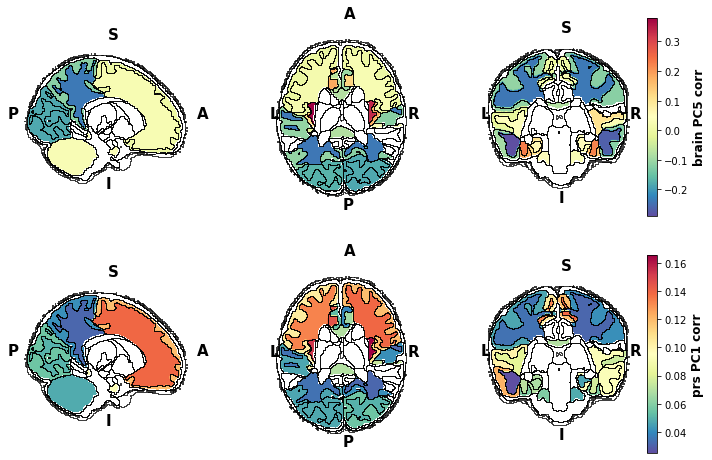

In [468]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
_, map_view_dict = visualisation.Brainmap.plot_segmentation(
    map_view=['sagittal', 'axial', 'coronal'],
    atlas_slice=120,
    plot_values=brain_plot_values,
    colorbar=True,
    atlas_file='../../dataset/visualise/Imperial/atlas_t40.nii.gz',
    cb_orientation='vertical',
    cmap_reversed=True,
    axes=ax[0],
    fig=fig,
    cb_title='brain PC5 corr')

_, map_view_dict = visualisation.Brainmap.plot_segmentation(
    map_view=['sagittal', 'axial', 'coronal'],
    atlas_slice=120,
    plot_values=prs_plot_values,
    colorbar=True,
    atlas_file='../../dataset/visualise/Imperial/atlas_t40.nii.gz',
    cb_orientation='vertical',
    cmap_reversed=True,
    axes=ax[1],
    fig=fig,
    cb_title='prs PC1 corr')
# fig.savefig('./brain_plots.png')

In [41]:
ROIs_coord_Imperial = visualisation.Brainmap.get_ROIs_coordinates('../../dataset/visualise/Imperial/atlas_t40.nii.gz')

In [486]:
standardized_ROIs_coord = ROIs_coord_Imperial.copy()
standardized_ROIs_coord[['X','Y','Z']] = StandardScaler().fit_transform(ROIs_coord_Imperial[['X','Y','Z']])

In [487]:
posterior_labels = standardized_ROIs_coord.loc[standardized_ROIs_coord['Y']<0,'Label'].to_list()
anterior_labels = standardized_ROIs_coord.loc[standardized_ROIs_coord['Y']>=0,'Label'].to_list()

Text(0.5, 0, 'Posterior - - - Anterior')

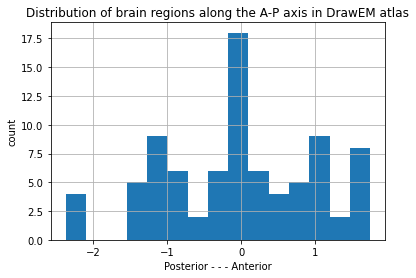

In [167]:
ax=plt.subplot(111)
standardized_ROIs_coord.loc[[int(i.split(' ')[1])-1 for i in cor_labels],'Y'].hist(ax=ax,bins=15)
ax.set_title('Distribution of brain regions along the A-P axis in DrawEM atlas')
ax.set_ylabel('count')
ax.set_xlabel('Posterior - - - Anterior')

In [488]:
df['Anterior_volumes'] = df[[
    f'Imperial {int(i)}' for i in anterior_labels
    if f'Imperial {int(i)}' in cor_labels
]].sum(axis=1)
df['Posterior_volumes'] = df[[
    f'Imperial {int(i)}' for i in posterior_labels
    if f'Imperial {int(i)}' in cor_labels
]].sum(axis=1)
df['total_WM_GM_volumes'] = df[cor_labels].sum(axis=1)

In [489]:
_, anterior_posterior = data_exploration.MassUnivariate.mass_univariate(df,
                                               cat_independentVar_cols=['Gender'],
                                               cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca','Total_Brain_Volume_Imperial']+ancestry,
                                                  dependentVar_cols=['Anterior_volumes',
                                                                     'Posterior_volumes',
                                                                     'total_WM_GM_volumes'],
                                                                       scaling='both')

In [490]:
anterior_posterior

,const_coef,const_pval,PMA_vol_coef,PMA_vol_pval,GA_vol_coef,GA_vol_pval,PRS_pca_coef,PRS_pca_pval,Total_Brain_Volume_Imperial_coef,Total_Brain_Volume_Imperial_pval,euro_Anc_PC1_coef,euro_Anc_PC1_pval,euro_Anc_PC2_coef,euro_Anc_PC2_pval,euro_Anc_PC3_coef,euro_Anc_PC3_pval,Gender_2.0_coef,Gender_2.0_pval
Anterior_volumes,-0.002617,0.840208,-0.115192,3.124801e-10,0.002836,0.809308,0.030993,0.000784,1.064221,1.845168e-159,0.012824,0.167499,-0.017279,0.060281,0.011682,0.208269,0.005482,0.783776
Posterior_volumes,0.005989,0.672885,0.116934,4.172795e-09,-0.001012,0.937171,-0.038490,0.000143,0.906414,1.413461e-135,-0.012591,0.214772,0.021136,0.035665,-0.011774,0.245737,-0.012547,0.565629
total_WM_GM_volumes,0.001481,0.597666,-0.005274,1.649768e-01,0.001026,0.686235,-0.001956,0.321351,1.002912,6.908928e-307,0.000792,0.692778,0.000936,0.636709,0.000575,0.773954,-0.003102,0.472702


In [211]:
Imperial_label = pd.read_excel(open(
    f'../../dataset/volumetric/full_dataset/allSubjectsWithKANA_AALVolumes_mm3_4Harriet_withCovariates_withImperialLegendsOK.xlsx',
    'rb'),
                               sheet_name='IMPERIAL ROIs LEGEND',
                               header=None).drop([0, 1], axis=1)
from string import digits

Imperial_label = np.asarray([
    str.strip(i.translate({ord(c): None
                           for c in digits}))
    for i in (np.asarray(Imperial_label)).reshape(-1)
])

In [172]:
dependentVar = [i for i in df.columns if bool(re.search('Imperial \d', i))]
thresholds = [i for i in df.columns if 'euro_ld_no_dups' in i]
european_volumetric_term_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
    df,
    thresholds=thresholds,
    cat_independentVar_cols=['Gender'],
    cont_independentVar_cols=[
        'PMA_vol', 'GA_vol', 'Total_Brain_Volume_Imperial'
    ] + ancestry,
    dependentVar_cols=dependentVar,
    scaling='both')

100%|██████████████████████████████████████████████████████| 23/23 [00:03<00:00,  6.70it/s]


In [173]:
european_volumetric_term_mass_univariate.sort_values(by='PRS_pval')

,Connection,const_coef,const_pval,PMA_vol_coef,PMA_vol_pval,GA_vol_coef,GA_vol_pval,Total_Brain_Volume_Imperial_coef,Total_Brain_Volume_Imperial_pval,euro_Anc_PC1_coef,euro_Anc_PC1_pval,euro_Anc_PC2_coef,euro_Anc_PC2_pval,euro_Anc_PC3_coef,euro_Anc_PC3_pval,PRS_coef,PRS_pval,Gender_2.0_coef,Gender_2.0_pval,threshold
1752,Imperial 13,0.004844,0.914793,0.157284,1.088865e-02,0.001417,0.972454,0.731496,3.309848e-32,0.001958,0.952145,-0.051380,0.110851,0.027029,0.404948,0.129701,0.000068,-0.010147,0.883956,euro_ld_no_dups_imputed1
1665,Imperial 13,0.004854,0.914932,0.160978,9.398478e-03,0.000060,0.998840,0.728699,7.747675e-32,0.000228,0.994444,-0.051363,0.112902,0.028265,0.385443,0.123046,0.000167,-0.010168,0.884158,euro_ld_no_dups_imputed0.5
882,Imperial 13,0.008002,0.860395,0.156799,1.160557e-02,0.003202,0.938143,0.733159,4.603388e-32,-0.007462,0.818610,-0.051270,0.114615,0.022614,0.489135,0.118207,0.000270,-0.016762,0.810310,euro_ld_no_dupsPt_1
795,Imperial 13,0.008755,0.847599,0.160747,9.740538e-03,0.001799,0.965260,0.731017,7.515318e-32,-0.009938,0.759951,-0.051328,0.115056,0.023344,0.475690,0.115220,0.000378,-0.018339,0.793081,euro_ld_no_dupsPt_0.5
1926,Imperial 13,-0.000392,0.993172,0.159468,1.048478e-02,0.010208,0.805451,0.732283,7.414933e-32,-0.003725,0.909563,-0.045677,0.158132,0.030417,0.352693,0.111946,0.000594,0.000821,0.990707,prs_pca_euro_ld_no_dups_PC0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,Imperial 48,-0.066463,0.299868,0.048219,5.788845e-01,-0.099919,0.086704,0.754868,3.310880e-20,-0.019360,0.670665,0.051377,0.252097,0.009201,0.840778,0.000051,0.999085,0.139229,0.158710,euro_ld_no_dups_imputed0.01
1961,Imperial 48,-0.066451,0.299872,0.048233,5.773077e-01,-0.099928,0.085616,0.754869,3.336541e-20,-0.019371,0.672735,0.051390,0.255781,0.009204,0.840465,-0.000051,0.999090,0.139203,0.158649,prs_pca_euro_ld_no_dups_PC0
128,Imperial 42,-0.029881,0.498387,0.075363,2.100023e-01,-0.057274,0.153562,0.850301,1.033032e-40,0.017881,0.572572,-0.010937,0.722901,-0.028047,0.378468,0.000015,0.999601,0.062596,0.355658,euro_ld_no_dupsPt_1e-07
1027,Imperial 71,0.081098,0.185260,-0.506834,4.615815e-09,0.023961,0.665807,1.005818,1.306267e-32,0.051556,0.239102,0.035962,0.401317,0.031966,0.468975,-0.000013,0.999756,-0.169886,0.071102,euro_ld_no_dups_imputed1e-08


<AxesSubplot:xlabel='Adj. euro_ld_no_dups_imputed1', ylabel='Adj. Imperial 13'>

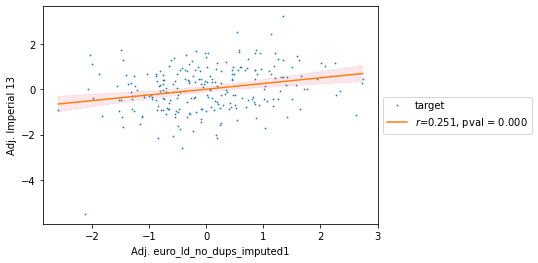

In [186]:
visualisation.simple_plots.plot_Linear_Reg(x='euro_ld_no_dups_imputed1',
                                          y='Imperial 13',
                                          data=df,adjust_covar={'y':['Gender','PMA_vol','GA_vol','Total_Brain_Volume_Imperial'],
                                                               'x':ancestry})

In [182]:
corr_matrix = np.corrcoef(df[[i for i in df.columns if bool(re.search('Imperial \d', i))]].values,rowvar=False)
corr_matrix = np.corrcoef(df[[i for i in df.columns if 'euro_ld_no_dups' in i]].values,rowvar=False)
data_exploration.matSpDLite(corr_matrix)

Effective Number of Independent Variables [Veff] is 17.559566766418545
Effective Number of Independent Variables [VeffLi] (Using equation 5 of Li and Ji 2005) is 9.0
The adjusted multiple testing correction p-val is alpha/lower(Meff) = 0.005555555555555552


9.000000000000005

In [183]:
0.05/34/9

0.0001633986928104575

In [178]:
0.05/20

0.0025

In [166]:
to_plot=european_volumetric_term_mass_univariate[(european_volumetric_term_mass_univariate['Connection'] == 'Anterior_volumes')
                                                & (european_volumetric_term_mass_univariate['threshold'].isin([i for i in df.columns if 'ASD' in i]))].copy()


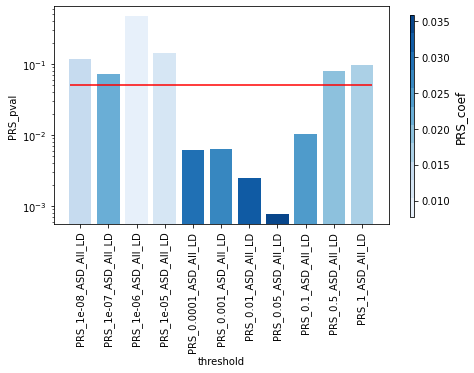

In [179]:
visualisation.simple_plots.Bar(x='threshold',
                              y='PRS_pval',
                              colorby='PRS_coef',
                               order={'x':[i for i in df.columns if 'ASD' in i]},
                               yscalelog=True,
                               cmap='Blues',
                              data=to_plot,rotation_x=90,hline=0.05)

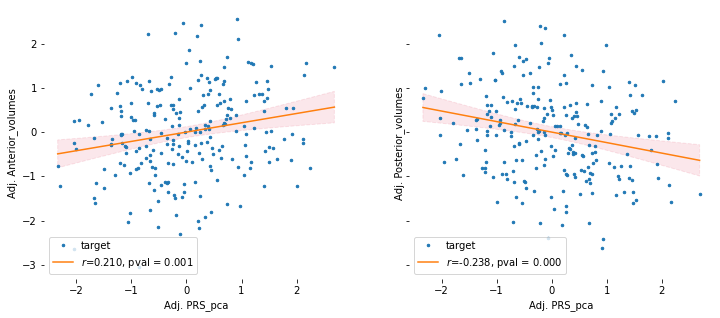

In [495]:
fig,axes = plt.subplots(1,2,figsize=(12,5),sharey=True)
visualisation.simple_plots.plot_Linear_Reg(x='PRS_pca',
                                          y='Anterior_volumes',
                                          adjust_covar={'x':ancestry,
                                                       'y':['PMA_vol',
                                                            'GA_vol','Gender','Total_Brain_Volume_Imperial']},
                                          data=df,ax=axes[0],legend_loc='inside',markersize=5)
visualisation.simple_plots.plot_Linear_Reg(x='PRS_pca',
                                          y='Posterior_volumes',
                                          adjust_covar={'x':ancestry,
                                                       'y':['PMA_vol',
                                                            'GA_vol','Gender','Total_Brain_Volume_Imperial']},
                                          data=df,ax=axes[1],legend_loc='inside',markersize=5)
sns.despine(bottom=True,left=True)

In [29]:
Imperial_label = pd.read_excel(open(
    f'../../dataset/volumetric/full_dataset/allSubjectsWithKANA_AALVolumes_mm3_4Harriet_withCovariates_withImperialLegendsOK.xlsx',
    'rb'),
                               sheet_name='IMPERIAL ROIs LEGEND',
                               header=None).drop([0, 1], axis=1)
# from string import digits

# Imperial_label = np.asarray([
#     str.strip(i.translate({ord(c): None
#                            for c in digits}))
#     for i in (np.asarray(Imperial_label)).reshape(-1)
# ])

In [655]:
df[[i for i in df.columns if bool(re.search('Imperial \d',i))]]

,Imperial 1,Imperial 2,Imperial 3,Imperial 4,Imperial 5,Imperial 6,Imperial 7,Imperial 8,Imperial 9,Imperial 10,...,Imperial 78,Imperial 79,Imperial 80,Imperial 81,Imperial 82,Imperial 83,Imperial 84,Imperial 85,Imperial 86,Imperial 87
0,874.625,963.625,491.875,604.750,1840.500,1795.375,2256.500,2105.625,2097.750,1995.625,...,4037.375,69487.750,69691.375,47000.875,48016.625,93677.250,55878.750,8274.750,543.875,428.875
1,791.375,852.375,588.375,677.750,2040.000,1807.375,1817.125,1378.500,2000.875,2005.250,...,3442.250,64118.625,65930.125,36914.000,39497.250,74754.000,49335.375,8520.125,644.000,474.625
2,1031.000,914.750,495.625,582.875,1800.750,1794.375,2073.500,1864.875,1399.125,1478.375,...,2935.625,62937.375,64082.750,39302.125,38045.375,92236.750,54146.375,8290.500,662.625,489.625
3,928.375,853.125,567.500,641.875,1546.250,1970.875,1794.000,1568.875,1869.000,1837.125,...,3744.125,66836.250,66816.500,42356.750,43159.875,107557.250,55789.500,8548.250,616.250,578.000
4,653.500,825.250,484.625,564.000,1367.375,1622.125,1666.250,1662.375,1664.625,1613.000,...,3214.750,63087.375,64010.125,41062.750,41386.375,103932.000,55322.250,8173.625,842.000,498.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,717.250,842.125,379.750,416.750,1500.875,1892.500,1418.500,1424.750,1516.125,1572.250,...,2632.000,52212.125,51875.750,35121.750,36290.500,57887.250,50040.875,6644.000,460.125,407.625
203,726.875,851.750,465.375,494.125,1319.625,1427.750,1366.500,1461.375,1683.125,1633.625,...,3109.750,53251.875,51770.500,33525.125,34503.500,78296.125,47635.625,7334.875,503.375,464.750
204,706.750,819.500,473.500,504.375,1525.500,1766.375,1595.625,1553.000,2166.875,1917.750,...,3239.000,57200.000,58440.625,37830.250,38561.250,69468.375,52178.000,7531.375,507.625,569.500
205,780.875,929.125,503.250,605.000,1657.000,1721.750,1682.375,2038.375,1855.750,1666.875,...,4145.375,61033.375,61534.375,41058.500,43068.500,76366.875,53278.125,7649.000,552.750,445.625


In [180]:
(Imperial_label.loc[[int(i)-1 for i in posterior_labels if f'Imperial {int(i)}' in cor_labels]].values)

76

In [316]:
Imperial_label.loc[[int(i)-1 for i in posterior_labels if f'Imperial {int(i)}' in cor_labels]].values

array([['22 Occipital lobe right GM'],
       ['23 Occipital lobe left GM'],
       ['24 Gyri parahippocampalis et ambiens posterior part right GM'],
       ['25 Gyri parahippocampalis et ambiens posterior part left GM'],
       ['26 Lateral occipitotemporal gyrus, gyrus fusiformis posterior part right GM'],
       ['27 Lateral occipitotemporal gyrus, gyrus fusiformis posterior part left GM'],
       ['28 Medial and inferior temporal gyri posterior part right GM'],
       ['29 Medial and inferior temporal gyri posterior part left GM']],
      dtype=object)

In [714]:
ROIs_coord_Imperial.loc[[int(i)-1 for i in anterior_labels if f'Imperial {int(i)}' in cor_labels]]

,Label,X,Y,Z
4,5.0,60.979500,160.592403,51.821978
5,6.0,140.444429,163.718101,52.267737
8,9.0,72.832858,131.352327,62.578770
9,10.0,128.907472,133.927205,61.643124
10,11.0,31.523008,133.604356,97.191093
11,12.0,168.733760,139.030384,98.967407
13,14.0,169.198490,132.586999,68.232486
20,21.0,50.955265,155.048079,97.600580
31,32.0,105.413106,184.395473,122.748662
32,33.0,92.351560,185.616209,119.780158


In [715]:
ROIs_coord_Imperial.loc[[int(i)-1 for i in posterior_labels if f'Imperial {int(i)}' in cor_labels]]

,Label,X,Y,Z
12,13.0,32.066456,128.415956,65.294901
14,15.0,57.676516,124.436685,56.409056
15,16.0,144.673043,128.176082,56.706471
21,22.0,127.874835,57.564563,105.623475
22,23.0,76.263030,54.097854,103.515745
37,38.0,140.098530,100.754051,149.542644
38,39.0,58.208310,98.673828,146.524064


In [311]:
standardized_ROIs_coord[(standardized_ROIs_coord['Y']>=0.5) & (standardized_ROIs_coord['Y']<1)]

,Label,X,Y,Z
2,3.0,-0.795929,0.546346,-0.916389
3,4.0,0.783025,0.629964,-0.914056
4,5.0,-0.973752,0.956242,-1.602212
19,20.0,1.202659,0.860111,0.254404
20,21.0,-1.222201,0.783255,0.190665
45,46.0,0.712432,0.868415,0.184571
46,47.0,-0.753078,0.810107,0.178492
47,48.0,-0.021546,0.628240,0.934996
50,51.0,-1.075752,0.926405,-1.634842
62,63.0,1.044663,0.943444,0.164044


In [147]:
Imperial_label.values

array([['1 Hippocampus left'],
       ['2 Hippocampus right'],
       ['3 Amygdala left'],
       ['4 Amygdala right'],
       ['5 Anterior temporal lobe, medial part left GM'],
       ['6 Anterior temporal lobe, medial part right GM'],
       ['7 Anterior temporal lobe, lateral part left GM'],
       ['8 Anterior temporal lobe, lateral part right GM'],
       ['9 Gyri parahippocampalis et ambiens anterior part left GM'],
       ['10 Gyri parahippocampalis et ambiens anterior part right GM'],
       ['11 Superior temporal gyrus, middle part left GM'],
       ['12 Superior temporal gyrus, middle part right GM'],
       ['13 Medial and inferior temporal gyri anterior part left GM'],
       ['14 Medial and inferior temporal gyri anterior part right GM'],
       ['15 Lateral occipitotemporal gyrus, gyrus fusiformis anterior part left GM'],
       ['16 Lateral occipitotemporal gyrus, gyrus fusiformis anterior part right GM'],
       ['17 Cerebellum left'],
       ['18 Cerebellum right'],
  

In [330]:
df[['ID','ID','Anterior_volumes']].to_csv('../../dataset/genetic_dataset/pheno_cov_files/asd/phenotype_EUR.txt', index=False,header=['FID','IID','Anterior_volumes'],sep='\t')
df[[
    'ID','ID','GA_vol', 'PMA_vol', 'Gender', 'euro_Anc_PC1', 'euro_Anc_PC2',
    'euro_Anc_PC3', 'Total_Brain_Volume_Imperial'
]].to_csv('../../dataset/genetic_dataset/pheno_cov_files/asd/covariate_EUR.txt', sep='\t', index=False, header=['FID','IID','GA','PMA','Gender','euro_Anc_PC1','euro_Anc_PC2','euro_Anc_PC3',
                                                         'TBV'])

##### Stability test

In [576]:
df = european_volumetric_dataset_term.copy()
ancestry = [f'euro_Anc_PC{i}' for i in range(1,4)]
df = data_preprocessing.Volumes.Group_Imperial_volumes(df,grouping='gmwm2gether',remove_duplicated=False)
dependentVar = [
    i for i in df.columns
    if bool(re.search('Imperial \d',i))
]
df = data_exploration.MassUnivariate.remove_outliers(df,
                                                    col=dependentVar,
                                                     threshold=3,
                                                    remove_schemes='percentage',
                                                    percentage_of_outlier=0.1)
df = df.rename(columns = {'AAL 93':'AAL 109'})
df = df.rename(columns={i:i+'_ASD_All_LD' for i in df.columns if 'PRS' in i})

In [581]:
df['Anterior_volumes'] = df[[
    f'Imperial {int(i)}' for i in anterior_labels
    if f'Imperial {int(i)}' in cor_labels
]].sum(axis=1)
df['Posterior_volumes'] = df[[
    f'Imperial {int(i)}' for i in posterior_labels
    if f'Imperial {int(i)}' in cor_labels
]].sum(axis=1)

In [637]:
total_df = pd.DataFrame()
for i in range(11):
    set1,set2 = train_test_split(df,test_size=.5,random_state=i)

    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
                    df = set1,
                    dependentVar_cols=[i for i in df.columns if 'All_LD' in i],
                    scaling=True,
                    n_components=1)
    set1['PRS_pca'] = prs_pca[:,0]
    
    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
                    df = set2,
                    dependentVar_cols=[i for i in df.columns if 'All_LD' in i],
                    scaling=True,
                    n_components=1)
    set2['PRS_pca'] = prs_pca[:,0]
    
    _,set1_mass = data_exploration.MassUnivariate.mass_univariate(set1,
                                               cat_independentVar_cols=['Gender'],
                                               cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca',
                                                                           'Total_Brain_Volume_Imperial']+ancestry,
                                                  dependentVar_cols=['Anterior_volumes','Posterior_volumes'],
                                                                       scaling='both')
    
    _,set2_mass = data_exploration.MassUnivariate.mass_univariate(set2,
                                               cat_independentVar_cols=['Gender'],
                                               cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca',
                                                                           'Total_Brain_Volume_Imperial']+ancestry,
                                                  dependentVar_cols=['Anterior_volumes','Posterior_volumes'],
                                                                       scaling='both')
    
    set1_mass['set'] = 'set1'
    set2_mass['set'] = 'set2'
    set1_mass['split'] = f'split{i}'
    set2_mass['split'] = f'split{i}'
    total_df = pd.concat([total_df,pd.concat([set1_mass,set2_mass])])
    

In [638]:
total_df = total_df.reset_index()

In [639]:
total_df.set_index(['split','index','set']).sort_values(by=['index','split'])

const_coef  const_pval  PMA_vol_coef  \
split   index             set                                          
split0  Anterior_volumes  set1    0.046791    0.310071     -0.039981   
                          set2   -0.019704    0.702292     -0.197154   
split1  Anterior_volumes  set1    0.025371    0.547016     -0.152438   
                          set2   -0.028141    0.514416     -0.131720   
split10 Anterior_volumes  set1    0.045470    0.258217     -0.091158   
                          set2   -0.075448    0.142996     -0.198055   
split2  Anterior_volumes  set1    0.019331    0.630966     -0.211639   
                          set2   -0.036766    0.488487     -0.129043   
split3  Anterior_volumes  set1   -0.024533    0.622186     -0.145443   
                          set2    0.029466    0.523766     -0.125453   
split4  Anterior_volumes  set1   -0.001186    0.983808     -0.087891   
                          set2    0.046063    0.191727     -0.123262   
split5  Anterior_volumes  set1   -0.032690    0.534250     -0.100271   
                          set2    0.038053    0.340870     -0.214330   
split6  Anterior_volumes  set1    0.024213    0.684562     -0.114121   
                          set2   -0.043901    0.265841     -0.243039   
split7  Anterior_volumes  set1    0.030238    0.406272     -0.124161   
                          set2   -0.056557    0.297680     -0.184150   
split8  Anterior_volumes  set1   -0.046756    0.312299     -0.142907   
                          set2    0.068604    0.091706     -0.052094   
split9  Anterior_volumes  set1    0.012838    0.725269     -0.121145   
                          set2    0.017173    0.772101     -0.082297   
split0  Posterior_volumes set1   -0.006151    0.899024     -0.009236   
                          set2   -0.038533    0.457009      0.075124   
split1  Posterior_volumes set1    0.007793    0.880730      0.153242   
                          set2   -0.000831    0.986580     -0.024560   
split10 Posterior_volumes set1   -0.036196    0.399474      0.006761   
                          set2    0.082064    0.216922      0.139917   
split2  Posterior_volumes set1   -0.044426    0.382818      0.051242   
                          set2    0.056744    0.283636      0.066430   
split3  Posterior_volumes set1    0.017251    0.732235      0.055215   
                          set2   -0.007869    0.852915      0.050549   
split4  Posterior_volumes set1   -0.020205    0.727079     -0.000860   
                          set2   -0.000949    0.984909      0.054759   
split5  Posterior_volumes set1    0.036818    0.494318      0.052905   
                          set2   -0.065134    0.133370     -0.072933   
split6  Posterior_volumes set1   -0.037053    0.443328      0.019070   
                          set2    0.025286    0.659806      0.054843   
split7  Posterior_volumes set1   -0.033283    0.348791     -0.016889   
                          set2    0.042805    0.500276      0.103312   
split8  Posterior_volumes set1    0.039104    0.510679      0.059419   
                          set2   -0.050172    0.253838     -0.038197   
split9  Posterior_volumes set1   -0.007324    0.858984     -0.003194   
                          set2   -0.013137    0.824253      0.048282   

                                PMA_vol_pval  GA_vol_coef  GA_vol_pval  \
split   index             set                                            
split0  Anterior_volumes  set1      0.577518    -0.032873     0.488766   
                          set2      0.039258     0.072393     0.313693   
split1  Anterior_volumes  set1      0.023939     0.022593     0.670244   
                          set2      0.089948     0.039545     0.385253   
split10 Anterior_volumes  set1      0.157672     0.045413     0.288307   
                          set2      0.016510    -0.015063     0.767771   
split2  Anterior_volumes  set1      0.037502     0.052903     0.378142   
                          set2      0.024737    -0.00

#### Mixed AAL

In [115]:
df = mixed_volumetric_dataset_term.copy()
ancestry = [f'mixed_Anc_PC{i}' for i in range(1,6)]
dependentVar = [
    i for i in european_volumetric_dataset_term.columns
    if bool(re.search('AAL \d',i))
]
# df = european_volumetric_dataset_term.copy()
# df = data_preprocessing.Volumes.Group_Imperial_volumes(df,grouping=None)
# df = data_exploration.MassUnivariate.remove_outliers(df,
#                                                     col=dependentVar,
#                                                      threshold=3,
#                                                     remove_schemes='percentage',
#                                                     percentage_of_outlier=0.1)
df = df.rename(columns = {'AAL 93':'AAL 109'})
df = df.rename(columns={i:i+'_ASD_All_LD' for i in df.columns if 'PRS' in i})

# prs_lds = ['All_LD','AllLDimputed','Euro_LD','EuroLDimputed']
prs_lds = ['All_LD']
for threshold in prs_lds:
    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df = df,
    dependentVar_cols=[i for i in df.columns if threshold in i],
    scaling=True,
    n_components=1)
    for i in range(prs_pca.shape[1]):
        df[f'prs_pca_{threshold}_PC{i}'] = prs_pca[:,i]

dependentVar_cols = [
    i for i in df.columns
    if bool(re.search('AAL \d', i))
]
pca, X_pca, brain_loading_matrix = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df=df,
    dependentVar_cols=dependentVar_cols,
    scaling=True,n_components = .8)

df['Brain_PC4'] = X_pca[:,3]
df['PRS_pca'] = prs_pca


In [116]:
prs_loading_matrix = df[[f'AAL {i}' for i in list(range(1, 93)) + [109]]].apply(
    lambda x: np.corrcoef(x.values, df['prs_pca_All_LD_PC0'].values)[0, 1],
    axis=0)

In [117]:
brain_loading_matrix = df[[f'AAL {i}' for i in list(range(1, 93)) + [109]]].apply(
    lambda x: np.corrcoef(x.values, df['Brain_PC4'])[0, 1],
    axis=0)

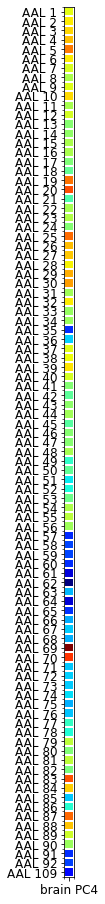

In [57]:
#see the loading matrix of PC4
fig, ax = plt.subplots(1, 1, figsize=(20, 16))
visualisation.visualise_heatmap(pd.DataFrame(brain_loading_matrix[3]),
                                ax,
                                xlabel=['brain PC4'],
                                ylabel=brain_loading_matrix.index.tolist())

In [118]:
plot_labels = [int(i.replace('AAL ','')) for i in brain_loading_matrix.index]
brain_plot_value_values = brain_loading_matrix.values
brain_plot_values = dict(zip(plot_labels,brain_plot_value_values)) 

prs_plot_value_values = prs_loading_matrix.values
prs_plot_values = dict(zip(plot_labels,prs_plot_value_values)) 

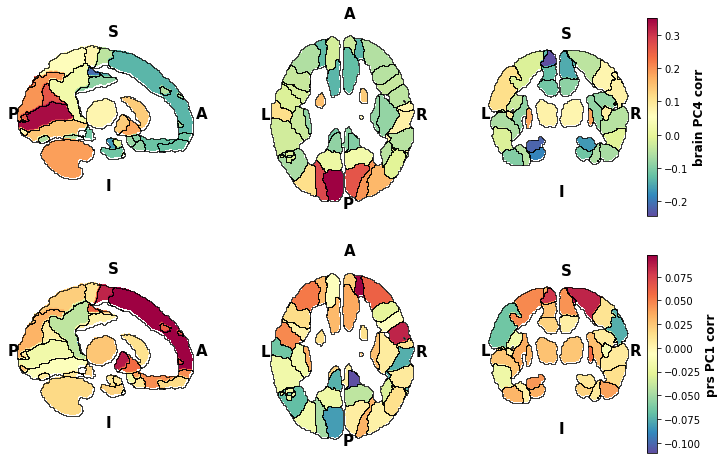

In [119]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
_, map_view_dict = visualisation.Brainmap.plot_segmentation(
    map_view=['sagittal', 'axial', 'coronal'],
    atlas_slice=120,
    plot_values=brain_plot_values,
    colorbar=True,
    atlas_file='../../dataset/visualise/AAL/KANA0.53_in_extdhcp40wk.nii.gz',
    cb_orientation='vertical',
    cmap_reversed=True,
    axes=ax[0],
    fig=fig,
    cb_title='brain PC4 corr')

_, map_view_dict = visualisation.Brainmap.plot_segmentation(
    map_view=['sagittal', 'axial', 'coronal'],
    atlas_slice=120,
    plot_values=prs_plot_values,
    colorbar=True,
    atlas_file='../../dataset/visualise/AAL/KANA0.53_in_extdhcp40wk.nii.gz',
    cb_orientation='vertical',
    cmap_reversed=True,
    axes=ax[1],
    fig=fig,
    cb_title='prs PC1 corr')
# fig.savefig('./brain_plots.png')

In [120]:
ROIs_coord = visualisation.Brainmap.get_ROIs_coordinates('../../dataset/visualise/AAL/KANA0.53_in_extdhcp40wk.nii.gz')

In [121]:
standardized_ROIs_coord = ROIs_coord.copy()
standardized_ROIs_coord[['X','Y','Z']] = StandardScaler().fit_transform(ROIs_coord[['X','Y','Z']])

In [122]:
standardized_ROIs_coord[standardized_ROIs_coord['Y']<0]
posterior_labels = standardized_ROIs_coord.loc[standardized_ROIs_coord['Y']<=0,'Label'].to_list()
anterior_labels = standardized_ROIs_coord.loc[standardized_ROIs_coord['Y']>0,'Label'].to_list()

In [123]:
df['Anterior_volumes'] = df[[f'AAL {int(i)}' for i in anterior_labels if f'AAL {int(i)}' in df.columns]].sum(axis=1)
df['Posterior_volumes'] = df[[f'AAL {int(i)}' for i in posterior_labels  if f'AAL {int(i)}' in df.columns]].sum(axis=1)

In [124]:
_, anterior_posterior = data_exploration.MassUnivariate.mass_univariate(df,
                                               cat_independentVar_cols=['Gender'],
                                               cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca',
                                                                           '17 TOTAL BRAIN TISSUE VOLUME (mm3)']+ancestry,
                                                  dependentVar_cols=['Anterior_volumes','Posterior_volumes'],
                                                                       scaling='both')

In [125]:
anterior_posterior

,const_coef,const_pval,PMA_vol_coef,PMA_vol_pval,GA_vol_coef,GA_vol_pval,PRS_pca_coef,PRS_pca_pval,17 TOTAL BRAIN TISSUE VOLUME (mm3)_coef,17 TOTAL BRAIN TISSUE VOLUME (mm3)_pval,...,mixed_Anc_PC2_coef,mixed_Anc_PC2_pval,mixed_Anc_PC3_coef,mixed_Anc_PC3_pval,mixed_Anc_PC4_coef,mixed_Anc_PC4_pval,mixed_Anc_PC5_coef,mixed_Anc_PC5_pval,Gender_2.0_coef,Gender_2.0_pval
Anterior_volumes,-0.018238,0.355217,0.000201,0.994310,-0.030782,0.088642,0.027806,0.070882,0.986949,2.977871e-109,...,0.002694,0.843714,0.005411,0.693910,-0.015775,0.314037,0.029230,0.040233,0.039676,0.211202
Posterior_volumes,-0.030959,0.047125,0.107165,0.000002,-0.006147,0.665187,-0.027332,0.024513,0.914782,3.610157e-124,...,-0.003101,0.773357,0.007216,0.505496,0.002967,0.809904,0.006961,0.533576,0.067349,0.007418


In [126]:
data_exploration.MassUnivariate.get_model_summary(df,
                                                 cat_independentVar_cols=['Gender'],
                                                  cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca',
                                                                           '17 TOTAL BRAIN TISSUE VOLUME (mm3)']+ancestry,
                                                  dependentVar_cols=['Anterior_volumes'],scaling='both')

,beta_coefs,pvalues,Rsquared
const,-0.018238,3.552168e-01,4.014150e-01
PMA_vol,0.000201,9.943098e-01,8.970583e-09
GA_vol,-0.030782,8.864194e-02,5.144310e-04
PRS_pca,0.027806,7.088247e-02,5.794014e-04
17 TOTAL BRAIN TISSUE VOLUME (mm3),0.986949,2.977871e-109,2.936307e-01
mixed_Anc_PC1,-0.003260,8.483091e-01,6.453450e-06
mixed_Anc_PC2,0.002694,8.437145e-01,6.855521e-06
mixed_Anc_PC3,0.005411,6.939101e-01,2.732670e-05
mixed_Anc_PC4,-0.015775,3.140366e-01,1.791606e-04
mixed_Anc_PC5,0.029230,4.023271e-02,7.488313e-04


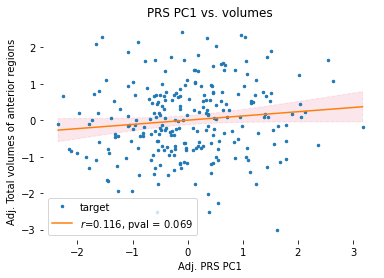

In [127]:
visualisation.simple_plots.plot_Linear_Reg(x='PRS_pca',
                              y = 'Anterior_volumes',
                              data=df,
                                           adjust_covar={'x':ancestry,
                                                        'y':['Gender','PMA_vol','GA_vol',
                                                                           '17 TOTAL BRAIN TISSUE VOLUME (mm3)']+ancestry},
                              markersize=5,legend_loc='inside',
                             ylabel='Total volumes of anterior regions',
                              xlabel='PRS PC1',
                             title='PRS PC1 vs. volumes',scaling='both')
sns.despine(bottom=True,left=True)

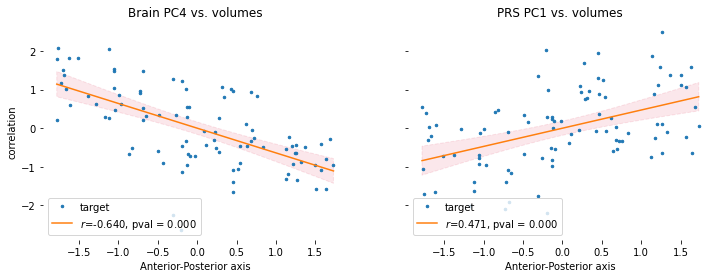

In [51]:
fig,ax = plt.subplots(1,2,figsize=(12,4),sharey=True)
visualisation.plot_Linear_Reg(ROIs_coord.loc[0:92,'Y'],
                              brain_loading_matrix,
                              markersize=5,ax=ax[0],legend_loc='inside',
                             xlabel='Anterior-Posterior axis',
                              ylabel='correlation',
                             title='Brain PC4 vs. volumes')
visualisation.plot_Linear_Reg(ROIs_coord.loc[0:92,'Y'],
                              prs_loading_matrix,
                              markersize=5,ax=ax[1],legend_loc='inside',
                             xlabel='Anterior-Posterior axis',
                             title='PRS PC1 vs. volumes')
sns.despine(bottom=True,left=True)
fig.savefig('./PCA_withbrainpos.png')

In [62]:
test = df[[i for i in df.columns if 'PRS' in i]].copy()
# test['PRS_pca'] = prs_pca

In [63]:
test = pd.DataFrame(test.unstack())
test['PRS_pca'] = [n[0] for i in df.columns if 'PRS' in i for n in prs_pca]

In [66]:
test = test.reset_index()
test.columns = ['threshold','level_1','PRS','PRS_pca']

<AxesSubplot:xlabel='PCA_prs PC1', ylabel='PRS'>

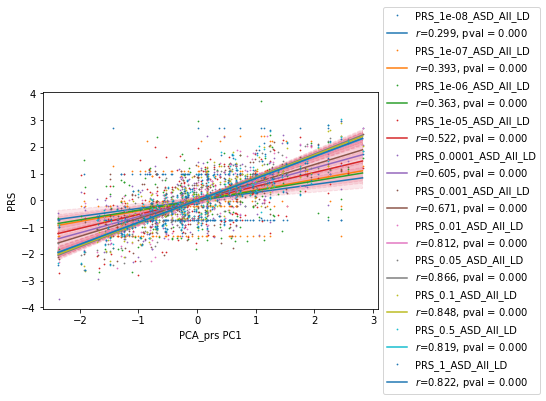

In [69]:
visualisation.plot_Linear_Reg(x='PRS_pca',
                             y='PRS',
                              hue = 'threshold',
                             data=test, xlabel='PCA_prs PC1',ylabel='PRS')

#### Mixed Imperial

In [144]:
df = mixed_volumetric_dataset_term.copy()
ancestry = [f'mixed_Anc_PC{i}' for i in range(1,6)]
df = data_preprocessing.Volumes.Group_Imperial_volumes(df,grouping=None,remove_duplicated=True)
dependentVar = [
    i for i in df.columns
    if bool(re.search('Imperial \d',i))
]
df = data_exploration.MassUnivariate.remove_outliers(df,
                                                    col=dependentVar,
                                                     threshold=3,
                                                    remove_schemes='percentage',
                                                    percentage_of_outlier=0.1)
df = df.rename(columns = {'AAL 93':'AAL 109'})
df = df.rename(columns={i:i+'_ASD_All_LD' for i in df.columns if 'PRS' in i})

# prs_lds = ['All_LD','AllLDimputed','Euro_LD','EuroLDimputed']
prs_lds = ['All_LD']
for threshold in prs_lds:
    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df = df,
    dependentVar_cols=[i for i in df.columns if threshold in i],
    scaling=True,
    n_components=1)
    for i in range(prs_pca.shape[1]):
        df[f'prs_pca_{threshold}_PC{i}'] = prs_pca[:,i]

dependentVar_cols = [
    i for i in df.columns
    if bool(re.search('AAL \d', i))
]
pca, X_pca, brain_loading_matrix = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df=df,
    dependentVar_cols=dependentVar_cols,
    scaling=True,n_components = .8)

df['Brain_PC4'] = X_pca[:,3]
df['PRS_pca'] = prs_pca


In [145]:
WM_labels = data_preprocessing.Volumes.extract_WM_Imperial(df[[i for i in df.columns if bool(re.search('Imperial \d',i))]]).columns.tolist()
GM_labels = data_preprocessing.Volumes.extract_GM_Imperial(df[[i for i in df.columns if bool(re.search('Imperial \d',i))]]).columns.tolist()
DGM_labels = data_preprocessing.Volumes.extract_deepGM_Imperial(df[[i for i in df.columns if bool(re.search('Imperial \d',i))]]).columns.tolist()
bs_labels = ['Imperial 19']
cerebellum_labels = ['Imperial 17','Imperial 18']
ventricle_labels = [f'Imperial {i}' for i in range(49,51)]
cor_labels = WM_labels+GM_labels+DGM_labels + bs_labels + cerebellum_labels + ventricle_labels
# cor_labels = WM_labels + GM_labels

In [475]:
prs_loading_matrix = df[[i for i in WM_labels if bool(re.search('Imperial \d',i))]].apply(
    lambda x: np.corrcoef(x.values, df['prs_pca_All_LD_PC0'].values)[0, 1],
    axis=0)

prs_loading_matrix = df[[i for i in GM_labels if bool(re.search('Imperial \d',i))]].apply(
    lambda x: np.corrcoef(x.values, df['prs_pca_All_LD_PC0'].values)[0, 1],
    axis=0)

prs_loading_matrix = df[[i for i in cor_labels if bool(re.search('Imperial \d',i))]].apply(
    lambda x: np.corrcoef(x.values, df['prs_pca_All_LD_PC0'].values)[0, 1],
    axis=0)

In [476]:
plot_labels = [int(i.replace('Imperial ','')) for i in prs_loading_matrix.index]

prs_plot_value_values = prs_loading_matrix.values
prs_plot_values = dict(zip(plot_labels,prs_plot_value_values)) 

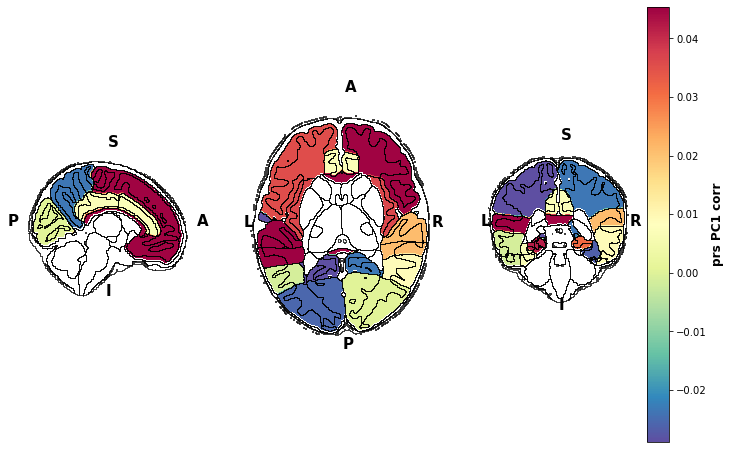

In [478]:
fig,ax = plt.subplots(1,3,figsize=(12,8))

_, map_view_dict = visualisation.Brainmap.plot_segmentation(
    map_view=['sagittal', 'axial', 'coronal'],
    plot_values=prs_plot_values,
    colorbar=True,
    atlas_file='../../dataset/visualise/Imperial/atlas_t40.nii.gz',
    cb_orientation='vertical',
    cmap_reversed=True,
    axes=ax,
    fig=fig,
    cb_title='prs PC1 corr')
# fig.savefig('./brain_plots.png')

In [224]:
ROIs_coord_Imperial = visualisation.Brainmap.get_ROIs_coordinates('../../dataset/visualise/Imperial/atlas_t40.nii.gz')

In [225]:
standardized_ROIs_coord = ROIs_coord_Imperial.copy()
standardized_ROIs_coord[['X','Y','Z']] = StandardScaler().fit_transform(ROIs_coord_Imperial[['X','Y','Z']])

In [146]:
standardized_ROIs_coord[standardized_ROIs_coord['Y']<0]
posterior_labels = standardized_ROIs_coord.loc[standardized_ROIs_coord['Y']<=0,'Label'].to_list()
anterior_labels = standardized_ROIs_coord.loc[standardized_ROIs_coord['Y']>0,'Label'].to_list()

In [147]:
df['Anterior_volumes'] = df[[f'Imperial {int(i)}' for i in anterior_labels if f'Imperial {int(i)}' in cor_labels]].sum(axis=1)
df['Posterior_volumes'] = df[[f'Imperial {int(i)}' for i in posterior_labels  if f'Imperial {int(i)}' in cor_labels]].sum(axis=1)

In [148]:
_, anterior_posterior = data_exploration.MassUnivariate.mass_univariate(df,
                                               cat_independentVar_cols=['Gender'],
                                               cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca',
                                                                           'Total_Brain_Volume_Imperial']+ancestry,
                                                  dependentVar_cols=['Anterior_volumes','Posterior_volumes'],
                                                                       scaling='both')

In [149]:
anterior_posterior

,const_coef,const_pval,PMA_vol_coef,PMA_vol_pval,GA_vol_coef,GA_vol_pval,PRS_pca_coef,PRS_pca_pval,Total_Brain_Volume_Imperial_coef,Total_Brain_Volume_Imperial_pval,...,mixed_Anc_PC2_coef,mixed_Anc_PC2_pval,mixed_Anc_PC3_coef,mixed_Anc_PC3_pval,mixed_Anc_PC4_coef,mixed_Anc_PC4_pval,mixed_Anc_PC5_coef,mixed_Anc_PC5_pval,Gender_2.0_coef,Gender_2.0_pval
Anterior_volumes,0.006022,0.671925,-0.092633,0.000007,-0.016084,0.217716,0.039425,0.000419,1.051819,6.530872e-146,...,-0.000932,0.924500,-0.018339,0.064784,0.002228,0.843227,0.008626,0.398519,-0.01311,0.567318
Posterior_volumes,-0.003280,0.804964,0.093403,0.000001,-0.005736,0.637501,-0.030984,0.002890,0.925670,3.373248e-140,...,-0.002908,0.751699,0.021178,0.022699,-0.009921,0.346296,-0.001230,0.897427,0.00714,0.738723


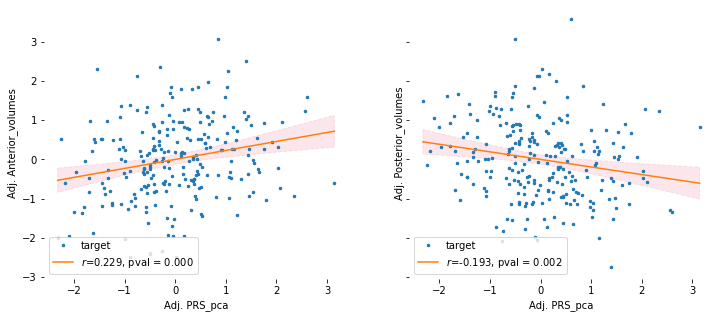

In [150]:
fig,axes = plt.subplots(1,2,figsize=(12,5),sharey=True)
visualisation.simple_plots.plot_Linear_Reg(x='PRS_pca',
                                          y='Anterior_volumes',
                                          adjust_covar={'x':ancestry,
                                                       'y':['PMA_vol',
                                                            'GA_vol',
                                                           'Total_Brain_Volume_Imperial']},
                                          data=df,ax=axes[0],legend_loc='inside',markersize=5)
visualisation.simple_plots.plot_Linear_Reg(x='PRS_pca',
                                          y='Posterior_volumes',
                                          adjust_covar={'x':ancestry,
                                                       'y':['PMA_vol',
                                                            'GA_vol',
                                                           'Total_Brain_Volume_Imperial']},
                                          data=df,ax=axes[1],legend_loc='inside',markersize=5)
sns.despine(bottom=True,left=True)

##### Stability test

In [640]:
df = mixed_volumetric_dataset_term.copy()
ancestry = [f'mixed_Anc_PC{i}' for i in range(1,6)]
df = data_preprocessing.Volumes.Group_Imperial_volumes(df,grouping='gmwm2gether',remove_duplicated=False)
dependentVar = [
    i for i in df.columns
    if bool(re.search('Imperial \d',i))
]
df = data_exploration.MassUnivariate.remove_outliers(df,
                                                    col=dependentVar,
                                                     threshold=3,
                                                    remove_schemes='percentage',
                                                    percentage_of_outlier=0.1)
df = df.rename(columns = {'AAL 93':'AAL 109'})
df = df.rename(columns={i:i+'_ASD_All_LD' for i in df.columns if 'PRS' in i})

In [641]:
df['Anterior_volumes'] = df[[
    f'Imperial {int(i)}' for i in anterior_labels
    if f'Imperial {int(i)}' in cor_labels
]].sum(axis=1)
df['Posterior_volumes'] = df[[
    f'Imperial {int(i)}' for i in posterior_labels
    if f'Imperial {int(i)}' in cor_labels
]].sum(axis=1)

In [642]:
total_df = pd.DataFrame()
for i in range(11):
    set1,set2 = train_test_split(df,test_size=.5,random_state=i)

    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
                    df = set1,
                    dependentVar_cols=[i for i in df.columns if 'All_LD' in i],
                    scaling=True,
                    n_components=1)
    set1['PRS_pca'] = prs_pca[:,0]
    
    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
                    df = set2,
                    dependentVar_cols=[i for i in df.columns if 'All_LD' in i],
                    scaling=True,
                    n_components=1)
    set2['PRS_pca'] = prs_pca[:,0]
    
    _,set1_mass = data_exploration.MassUnivariate.mass_univariate(set1,
                                               cat_independentVar_cols=['Gender'],
                                               cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca',
                                                                           'Total_Brain_Volume_Imperial']+ancestry,
                                                  dependentVar_cols=['Anterior_volumes','Posterior_volumes'],
                                                                       scaling='both')
    
    _,set2_mass = data_exploration.MassUnivariate.mass_univariate(set2,
                                               cat_independentVar_cols=['Gender'],
                                               cont_independentVar_cols=['PMA_vol','GA_vol','PRS_pca',
                                                                           'Total_Brain_Volume_Imperial']+ancestry,
                                                  dependentVar_cols=['Anterior_volumes','Posterior_volumes'],
                                                                       scaling='both')
    
    set1_mass['set'] = 'set1'
    set2_mass['set'] = 'set2'
    set1_mass['split'] = f'split{i}'
    set2_mass['split'] = f'split{i}'
    total_df = pd.concat([total_df,pd.concat([set1_mass,set2_mass])])
    

In [643]:
total_df = total_df.reset_index()

In [644]:
total_df.set_index(['split','index','set']).sort_values(by=['index','split'])

const_coef  const_pval  PMA_vol_coef  \
split   index             set                                          
split0  Anterior_volumes  set1    0.018939    0.319829     -0.081714   
                          set2   -0.013853    0.562348     -0.139279   
split1  Anterior_volumes  set1    0.014045    0.537598     -0.143701   
                          set2   -0.002139    0.912427     -0.076939   
split10 Anterior_volumes  set1    0.011764    0.580266     -0.111948   
                          set2    0.010332    0.626802     -0.103223   
split2  Anterior_volumes  set1    0.014032    0.549460     -0.115553   
                          set2   -0.000326    0.986655     -0.116008   
split3  Anterior_volumes  set1    0.018285    0.336112     -0.076823   
                          set2   -0.000730    0.974507     -0.149206   
split4  Anterior_volumes  set1   -0.005504    0.794954     -0.113406   
                          set2    0.026724    0.220132     -0.101783   
split5  Anterior_volumes  set1    0.018046    0.310815     -0.103006   
                          set2   -0.009205    0.713411     -0.124686   
split6  Anterior_volumes  set1    0.010641    0.661147     -0.094223   
                          set2    0.003202    0.865531     -0.137469   
split7  Anterior_volumes  set1    0.007317    0.721968     -0.108636   
                          set2    0.011745    0.577551     -0.085063   
split8  Anterior_volumes  set1   -0.010440    0.633866     -0.127258   
                          set2    0.021919    0.274118     -0.077082   
split9  Anterior_volumes  set1    0.008011    0.712691     -0.102508   
                          set2    0.009718    0.630235     -0.099230   
split0  Posterior_volumes set1    0.002192    0.915958     -0.020038   
                          set2    0.011344    0.650541      0.033144   
split1  Posterior_volumes set1    0.001831    0.942613      0.005808   
                          set2    0.006824    0.732529      0.003085   
split10 Posterior_volumes set1   -0.006841    0.756740      0.012747   
                          set2    0.005618    0.806404     -0.004367   
split2  Posterior_volumes set1   -0.002183    0.922260      0.003482   
                          set2    0.010828    0.627294      0.016302   
split3  Posterior_volumes set1   -0.008731    0.654714     -0.007216   
                          set2    0.011359    0.648297      0.028596   
split4  Posterior_volumes set1    0.020389    0.350136      0.017382   
                          set2   -0.011590    0.614824      0.005235   
split5  Posterior_volumes set1   -0.011560    0.540764     -0.019316   
                          set2    0.018531    0.468348      0.038116   
split6  Posterior_volumes set1    0.004409    0.852400     -0.005653   
                          set2   -0.000169    0.993638      0.026729   
split7  Posterior_volumes set1    0.012156    0.588197      0.026366   
                          set2   -0.007186    0.738092     -0.036845   
split8  Posterior_volumes set1    0.010274    0.659452      0.024494   
                          set2   -0.000881    0.967478     -0.018973   
split9  Posterior_volumes set1    0.014352    0.521008      0.004810   
                          set2   -0.010119    0.641859     -0.005382   

                                PMA_vol_pval  GA_vol_coef  GA_vol_pval  \
split   index             set                                            
split0  Anterior_volumes  set1      0.005314    -0.017004     0.357720   
                          set2      0.000021     0.022131     0.281028   
split1  Anterior_volumes  set1      0.000011     0.020684     0.312154   
                          set2      0.008642    -0.022751     0.220691   
split10 Anterior_volumes  set1      0.000866     0.003738     0.848348   
                          set2      0.000396    -0.002091     0.915487   
split2  Anterior_volumes  set1      0.000846     0.022579     0.308706   
                          set2      0.000059    -0.00

### Stability test

#### Halving the samples and then PCA

In [137]:
import numpy as np
from scipy.stats import f

def f_value(y1, x1, y2, x2):
    """This is the f_value function for the Chow Break test package
    Args:
        y1: Array like y-values for data preceeding the breakpoint
        x1: Array like x-values for data preceeding the breakpoint
        y2: Array like y-values for data occuring after the breakpoint
        x2: Array like x-values for data occuring after the breakpoint
    Returns:
        F-value: Float value of chow break test
    """
    def find_rss (y, x):
        """This is the subfunction to find the residual sum of squares for a given set of data
        Args:
            y: Array like y-values for data subset
            x: Array like x-values for data subset
        Returns:
            rss: Returns residual sum of squares of the linear equation represented by that data
            length: The number of n terms that the data represents
        """
        A = np.vstack([x, np.ones(len(x))]).T
        rss = np.linalg.lstsq(A, y, rcond=None)[1]
        length = len(y)
        return (rss, length)


    rss_total, n_total = find_rss(np.append(y1, y2), np.append(x1, x2))
    rss_1, n_1 = find_rss(y1, x1)
    rss_2, n_2 = find_rss(y2, x2)

    chow_nom = (rss_total - (rss_1 + rss_2)) / 2
    chow_denom = (rss_1 + rss_2) / (n_1 + n_2 - 4)
    return chow_nom / chow_denom


def p_value(y1, x1, y2, x2, **kwargs):
    F = f_value(y1, x1, y2, x2, **kwargs)
    if not F:
        return 1
    df1 = 2
    df2 = len(x1) + len(x2) - 4

    # The survival function (1-cdf) is more precise than using 1-cdf,
    # this helps when p-values are very close to zero.
    # -f.logsf would be another alternative to directly get -log(pval) instead.
    p_val = f.sf(F[0], df1, df2)
    return p_val

In [101]:
prs_cols = [i for i in df.columns if 'Euro' in i]
ancestry = ['euro_Anc_PC'+str(i) for i in range(1,4)]
brain_regions = [i for i in df.columns if bool(re.search('AAL \d',i))]

In [129]:
set1, set2 = data_exploration.Stability_tests.train_test_split_modified(df,
                                                                       'GA_vol',
                                                                       'PMA_vol',
                                                                       test_size=0.5,
                                                                       random_state=1)

In [131]:
_, X_pca_set1, loading_matrix1 = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
        df=set1,
        dependentVar_cols=dependentVar_cols,
        scaling=True,n_components = .8)

In [135]:
prs_lds = ['All_LD']
for threshold in prs_lds:
    _,prs_pca,_ = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df = set2,
    dependentVar_cols=[i for i in df.columns if threshold in i],
    scaling=True,
    n_components=1)
    for i in range(prs_pca.shape[1]):
        set2[f'prs_pca_{threshold}_PC{i}'] = prs_pca[:,i]

In [136]:
data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=set2,
        thresholds=['prs_pca_All_LD_PC0'],
        cat_independentVar_cols=['Gender'],
        cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry,
        dependentVar_cols=X_pca_set1)

100%|███████████████████████████████████████████████████| 1/1 [00:00<00:00, 44.48it/s]


,Connection,const_coef,const_pval,GA_vol_coef,GA_vol_pval,PMA_vol_coef,PMA_vol_pval,17 ICV (all except bone)_coef,17 ICV (all except bone)_pval,euro_Anc_PC1_coef,euro_Anc_PC1_pval,euro_Anc_PC2_coef,euro_Anc_PC2_pval,euro_Anc_PC3_coef,euro_Anc_PC3_pval,PRS_coef,PRS_pval,Gender_2.0_coef,Gender_2.0_pval,threshold
0,Dependent_Var_0,-1.117920,0.316351,0.234319,0.826995,-1.071564,0.500593,-0.453130,0.735226,-0.892921,0.304209,-1.352242,0.101691,-0.962948,0.264391,1.539704,0.071586,2.558796,0.155374,prs_pca_All_LD_PC0
1,Dependent_Var_1,0.070520,0.743123,-0.543172,0.010035,0.202154,0.510989,0.076410,0.768001,0.021926,0.895887,-0.187576,0.238636,-0.175585,0.292335,0.054580,0.739023,-0.161413,0.641336,prs_pca_All_LD_PC0
2,Dependent_Var_2,-0.185760,0.336294,-0.022852,0.902047,-0.081984,0.765832,0.068758,0.766996,-0.091706,0.541612,-0.068625,0.629284,0.342761,0.023221,0.016170,0.912251,0.425183,0.172660,prs_pca_All_LD_PC0
3,Dependent_Var_3,0.100885,0.579506,-0.309000,0.080338,0.335619,0.198364,-0.054076,0.804994,-0.168367,0.236456,-0.078244,0.559957,0.177040,0.209849,-0.116316,0.401901,-0.230913,0.431166,prs_pca_All_LD_PC0
4,Dependent_Var_4,-0.054945,0.747947,0.103304,0.530891,-0.280240,0.252607,0.274257,0.184660,-0.259310,0.053798,0.182067,0.150761,0.033238,0.801381,-0.068813,0.597251,0.125764,0.647830,prs_pca_All_LD_PC0
5,Dependent_Var_5,0.019672,0.904227,-0.056506,0.719864,0.111570,0.632929,-0.076226,0.698635,-0.209138,0.102919,-0.057054,0.636135,0.055820,0.658799,0.149610,0.231159,-0.045027,0.864164,prs_pca_All_LD_PC0


In [293]:
model_summary = defaultdict(dict)
for split_number in range(1,11):
    set1,set2 = data_exploration.Stability_tests.train_test_split_modified(df,
                                                                           'GA_vol',
                                                                           'PMA_vol',
                                                                           test_size=0.5,
                                                                           random_state=split_number)
    dependentVar_cols = [
        i for i in df.columns
        if bool(re.search('AAL \d', i))
    ]
    _, X_pca_set1, loading_matrix1 = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
        df=set1,
        dependentVar_cols=dependentVar_cols,
        scaling=True,n_components = .8)
    _, X_pca_set2, loading_matrix2 = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
        df=set2,
        dependentVar_cols=dependentVar_cols,
        scaling=True,n_components = .8)
    model_summary[f'split_{split_number}']=defaultdict(dict)
    model_summary[f'split_{split_number}']['set1']['loading_matrix']=loading_matrix1
    model_summary[f'split_{split_number}']['set2']['loading_matrix']=loading_matrix2

    set1_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=set1,
        thresholds=prs_cols,
        cat_independentVar_cols=['Gender'],
        cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry,
        dependentVar_cols=X_pca_set1)
    set2_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=set2,
        thresholds = prs_cols,
        cat_independentVar_cols=['Gender'],
        cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry,
        dependentVar_cols=X_pca_set2)
    
    set1_mass_univariate['set'] = 'set1'
    set2_mass_univariate['set'] = 'set2'
    set1_mass_univariate['split'] = f'split_{split_number}'
    set2_mass_univariate['split'] = f'split_{split_number}'
    
    set1_mass_univariate['Y_corr'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix1[int(x.split('_')[-1])].values)[0])
    set1_mass_univariate['Y_corr_pval'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix1[int(x.split('_')[-1])].values)[1])
    set1_mass_univariate['Z_corr'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix1[int(x.split('_')[-1])].values)[0])
    set1_mass_univariate['Z_corr_pval'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix1[int(x.split('_')[-1])].values)[1])
    
    
    set2_mass_univariate['Y_corr'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix2[int(x.split('_')[-1])].values)[0])
    set2_mass_univariate['Y_corr_pval'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix2[int(x.split('_')[-1])].values)[1])
    set2_mass_univariate['Z_corr'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix2[int(x.split('_')[-1])].values)[0])
    set2_mass_univariate['Z_corr_pval'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix2[int(x.split('_')[-1])].values)[1])
    
    model_summary[f'split_{split_number}']['set1']['mass_univariate']=set1_mass_univariate
    model_summary[f'split_{split_number}']['set2']['mass_univariate']=set2_mass_univariate


100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 53.56it/s]


In [348]:
model_summary_mass_unvariate = pd.concat([model_summary[i][n]['mass_univariate'] for i in model_summary.keys() for n in ['set1','set2']])

In [357]:
temp = model_summary_mass_unvariate[(model_summary_mass_unvariate['Z_corr_pval']<0.05)].copy()
temp = temp.sort_values(by='PRS_pval')
temp = temp[temp['PRS_pval']<0.05]

In [358]:
temp = temp.set_index(['split','threshold','set'])

In [359]:
temp = temp.groupby(temp.index).head(1)

In [360]:
index_like = pd.DataFrame(columns=temp.columns,index = pd.MultiIndex.from_frame(model_summary_mass_unvariate[['split','threshold','set']]).drop_duplicates())

In [361]:
temp = temp.reindex(index_like.index)

In [362]:
temp = temp.reset_index()
temp['split'] = pd.Categorical(values=temp['split'],categories=[f'split_{i}' for i in range(1,11)],ordered=True)
temp['threshold'] = pd.Categorical(values=temp['threshold'],categories=prs_cols,ordered=True)
temp['set'] = pd.Categorical(values=temp['set'],categories=['set1','set2'],ordered=True)
temp = temp.set_index(['split','threshold','set'])

In [363]:
temp = temp.sort_index()

In [364]:
temp[['Connection','PMA_vol_coef','PMA_vol_pval','PRS_coef','PRS_pval','Y_corr','Y_corr_pval','Z_corr','Z_corr_pval']].to_excel('./temp.xlsx')

#### Random stratified split then PCA

In [15]:
prs_cols = [i for i in df.columns if 'Euro' in i]
ancestry = ['euro_Anc_PC'+str(i) for i in range(1,4)]
brain_regions = [i for i in df.columns if bool(re.search('AAL \d',i))]

In [109]:
model_summary = defaultdict(dict)
pca, X_pca, loading_matrix = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df=df,
    dependentVar_cols=brain_regions,
    scaling=True,n_components = .8)

df['Brain_PC1'] = X_pca[:,1]
df['Brain_PC2'] = X_pca[:,2]
df['Brain_PC3'] = X_pca[:,3]
df['Brain_PC4'] = X_pca[:,4]
df['Brain_PC5'] = X_pca[:,5]

for split_number in range(1,11):
    train,test = data_exploration.Stability_tests.train_test_split_modified(df,
                                                                           'GA_vol',
                                                                           'PMA_vol',
                                                                           test_size=0.3,
                                                                           random_state=split_number)
    model_summary[f'split_{split_number}']['train']=defaultdict()
    model_summary[f'split_{split_number}']['test']=defaultdict()
    train_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=train,
        thresholds=prs_cols,
        cat_independentVar_cols=['Gender'],
        cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry,
        dependentVar_cols=[i for i in train.columns if 'Brain_PC' in i])

    test_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=test,
        thresholds = prs_cols,
        cat_independentVar_cols=['Gender'],
        cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry,
        dependentVar_cols=[i for i in test.columns if 'Brain_PC' in i])
    
    train_mass_univariate['set'] = 'train'
    test_mass_univariate['set'] = 'test'
    train_mass_univariate['split'] = f'split_{split_number}'
    test_mass_univariate['split'] = f'split_{split_number}'
    
    model_summary[f'split_{split_number}']['train']['mass_univariate']=train_mass_univariate
    model_summary[f'split_{split_number}']['test']['mass_univariate']=test_mass_univariate

100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 59.48it/s]


In [110]:
model_summary_mass_unvariate = pd.concat([model_summary[i][n]['mass_univariate'] for i in model_summary.keys() for n in ['train','test']])

In [112]:
# temp = model_summary_mass_unvariate[(model_summary_mass_unvariate['Y_corr_pval']<0.05)].copy()
temp = model_summary_mass_unvariate.copy()
temp = temp.sort_values(by='PRS_pval')
temp = temp[temp['PRS_pval']<0.05]

In [113]:
temp = temp.set_index(['split','threshold','Connection','set'])

In [114]:
temp

const_coef  const_pval  \
split    threshold             Connection set                             
split_7  PRS_0.01_ASD_Euro_LD  Brain_PC3  train    0.024758    0.846763   
split_5  PRS_0.01_ASD_Euro_LD  Brain_PC3  train    0.056166    0.666859   
split_6  PRS_1e-08_ASD_Euro_LD Brain_PC3  test    -0.112386    0.564032   
split_3  PRS_0.01_ASD_Euro_LD  Brain_PC5  test     0.237372    0.167242   
split_5  PRS_1e-07_ASD_Euro_LD Brain_PC3  test    -0.181136    0.449516   
...                                                     ...         ...   
split_10 PRS_0.05_ASD_Euro_LD  Brain_PC3  test    -0.238653    0.252975   
         PRS_1e-05_ASD_Euro_LD Brain_PC5  train    0.184568    0.134274   
split_8  PRS_0.5_ASD_Euro_LD   Brain_PC1  test    -0.105555    0.666234   
split_10 PRS_0.1_ASD_Euro_LD   Brain_PC3  test    -0.236672    0.257186   
         PRS_1e-08_ASD_Euro_LD Brain_PC3  train    0.160207    0.264218   

                                                 GA_vol_coef  GA_vol_pval  \
split    threshold             Connection set                               
split_7  PRS_0.01_ASD_Euro_LD  Brain_PC3  train     0.011032     0.927127   
split_5  PRS_0.01_ASD_Euro_LD  Brain_PC3  train     0.140068     0.279809   
split_6  PRS_1e-08_ASD_Euro_LD Brain_PC3  test     -0.183060     0.361844   
split_3  PRS_0.01_ASD_Euro_LD  Brain_PC5  test      0.190068     0.292758   
split_5  PRS_1e-07_ASD_Euro_LD Brain_PC3  test     -0.066346     0.722204   
...                                                      ...          ...   
split_10 PRS_0.05_ASD_Euro_LD  Brain_PC3  test      0.012736     0.947354   
         PRS_1e-05_ASD_Euro_LD Brain_PC5  train     0.319673     0.005434   
split_8  PRS_0.5_ASD_Euro_LD   Brain_PC1  test      0.098190     0.653923   
split_10 PRS_0.1_ASD_Euro_LD   Brain_PC3  test      0.002754     0.988599   
         PRS_1e-08_ASD_Euro_LD Brain_PC3  train     0.011146     0.934090   

                                                 PMA_vol_coef  PMA_vol_pval  \
split    threshold             Connection set                                 
split_7  PRS_0.01_ASD_Euro_LD  Brain_PC3  train     -0.799811      0.000028   
split_5  PRS_0.01_ASD_Euro_LD  Brain_PC3  train     -0.941068      0.000007   
split_6  PRS_1e-08_ASD_Euro_LD Brain_PC3  test      -0.156053      0.593832   
split_3  PRS_0.01_ASD_Euro_LD  Brain_PC5  test      -0.740806      0.002084   
split_5  PRS_1e-07_ASD_Euro_LD Brain_PC3  test      -0.758989      0.004840   
...                                                       ...           ...   
split_10 PRS_0.05_ASD_Euro_LD  Brain_PC3  test      -0.645891      0.021521   
         PRS_1e-05_ASD_Euro_LD Brain_PC5  train     -0.687614      0.000053   
split_8  PRS_0.5_ASD_Euro_LD   Brain_PC1  test      -0.311723      0.295299   
split_10 PRS_0.1_ASD_Euro_LD   Brain_PC3  test      -0.650522      0.020706   
         PRS_1e-08_ASD_Euro_LD Brain_PC3  train     -0.730804      0.000347   

                                                 17 ICV (all except bone)_coef  \
split    threshold             Connection set                                    
split_7  PRS_0.01_ASD_Euro_LD  Brain_PC3  train                       0.496133   
split_5  PRS_0.01_ASD_Euro_LD  Brain_PC3  train                       0.651392   
split_6  PRS_1e-08_ASD_Euro_LD Brain_PC3  test                        0.241737   
split_3  PRS_0.01_ASD_Euro_LD  Brain_PC5  test                        0.333688   
split_5  PRS_1e-07_ASD_Euro_LD Brain_PC3  test                        0.496634   
...                                                                        ...   
split_10 PRS_0.05_ASD_Euro_LD  Brain_PC3  test                        0.447763   
         PRS_1e-05_ASD_Euro_LD Brain_PC5  train                       0.299513   
split_8  PRS_0.5_ASD_Euro_LD   Brain_PC1  test                        0.322155   
split_10 PRS_0.1_ASD_Euro_LD   Brain_PC3  test                        0.465656   
         PRS_1e-08_ASD_Euro_LD Brain_PC3  train            

In [115]:
index_like = pd.DataFrame(columns=temp.columns,index = pd.MultiIndex.from_frame(model_summary_mass_unvariate[['split','threshold','Connection','set']]).drop_duplicates())

In [116]:
temp = temp.reindex(index_like.index)

In [117]:
temp

const_coef  const_pval  \
split    threshold             Connection set                             
split_1  PRS_1e-08_ASD_Euro_LD Brain_PC1  train         NaN         NaN   
                               Brain_PC2  train         NaN         NaN   
                               Brain_PC3  train         NaN         NaN   
                               Brain_PC4  train         NaN         NaN   
                               Brain_PC5  train         NaN         NaN   
...                                                     ...         ...   
split_10 PRS_1_ASD_Euro_LD     Brain_PC1  test          NaN         NaN   
                               Brain_PC2  test          NaN         NaN   
                               Brain_PC3  test    -0.284487    0.166055   
                               Brain_PC4  test          NaN         NaN   
                               Brain_PC5  test          NaN         NaN   

                                                 GA_vol_coef  GA_vol_pval  \
split    threshold             Connection set                               
split_1  PRS_1e-08_ASD_Euro_LD Brain_PC1  train          NaN          NaN   
                               Brain_PC2  train          NaN          NaN   
                               Brain_PC3  train          NaN          NaN   
                               Brain_PC4  train          NaN          NaN   
                               Brain_PC5  train          NaN          NaN   
...                                                      ...          ...   
split_10 PRS_1_ASD_Euro_LD     Brain_PC1  test           NaN          NaN   
                               Brain_PC2  test           NaN          NaN   
                               Brain_PC3  test     -0.004848     0.979349   
                               Brain_PC4  test           NaN          NaN   
                               Brain_PC5  test           NaN          NaN   

                                                 PMA_vol_coef  PMA_vol_pval  \
split    threshold             Connection set                                 
split_1  PRS_1e-08_ASD_Euro_LD Brain_PC1  train           NaN           NaN   
                               Brain_PC2  train           NaN           NaN   
                               Brain_PC3  train           NaN           NaN   
                               Brain_PC4  train           NaN           NaN   
                               Brain_PC5  train           NaN           NaN   
...                                                       ...           ...   
split_10 PRS_1_ASD_Euro_LD     Brain_PC1  test            NaN           NaN   
                               Brain_PC2  test            NaN           NaN   
                               Brain_PC3  test      -0.691777      0.011799   
                               Brain_PC4  test            NaN           NaN   
                               Brain_PC5  test            NaN           NaN   

                                                 17 ICV (all except bone)_coef  \
split    threshold             Connection set                                    
split_1  PRS_1e-08_ASD_Euro_LD Brain_PC1  train                            NaN   
                               Brain_PC2  train                            NaN   
                               Brain_PC3  train                            NaN   
                               Brain_PC4  train                            NaN   
                               Brain_PC5  train                            NaN   
...                                                                        ...   
split_10 PRS_1_ASD_Euro_LD     Brain_PC1  test                             NaN   
                               Brain_PC2  test                             NaN   
                               Brain_PC3  test                        0.500826   
                               Brain_PC4  test                             NaN   
                               Brain_PC5  test             

In [118]:
temp = temp.reset_index()
temp['split'] = pd.Categorical(values=temp['split'],categories=[f'split_{i}' for i in range(1,11)],ordered=True)
temp['threshold'] = pd.Categorical(values=temp['threshold'],categories=prs_cols,ordered=True)
temp['set'] = pd.Categorical(values=temp['set'],categories=['train','test'],ordered=True)
temp = temp.set_index(['split','threshold','Connection','set'])

In [119]:
temp = temp.sort_index()

In [120]:
temp

const_coef  const_pval  \
split    threshold             Connection set                             
split_1  PRS_1e-08_ASD_Euro_LD Brain_PC1  train         NaN         NaN   
                                          test          NaN         NaN   
                               Brain_PC2  train         NaN         NaN   
                                          test          NaN         NaN   
                               Brain_PC3  train         NaN         NaN   
...                                                     ...         ...   
split_10 PRS_1_ASD_Euro_LD     Brain_PC3  test    -0.284487    0.166055   
                               Brain_PC4  train         NaN         NaN   
                                          test          NaN         NaN   
                               Brain_PC5  train         NaN         NaN   
                                          test          NaN         NaN   

                                                 GA_vol_coef  GA_vol_pval  \
split    threshold             Connection set                               
split_1  PRS_1e-08_ASD_Euro_LD Brain_PC1  train          NaN          NaN   
                                          test           NaN          NaN   
                               Brain_PC2  train          NaN          NaN   
                                          test           NaN          NaN   
                               Brain_PC3  train          NaN          NaN   
...                                                      ...          ...   
split_10 PRS_1_ASD_Euro_LD     Brain_PC3  test     -0.004848     0.979349   
                               Brain_PC4  train          NaN          NaN   
                                          test           NaN          NaN   
                               Brain_PC5  train          NaN          NaN   
                                          test           NaN          NaN   

                                                 PMA_vol_coef  PMA_vol_pval  \
split    threshold             Connection set                                 
split_1  PRS_1e-08_ASD_Euro_LD Brain_PC1  train           NaN           NaN   
                                          test            NaN           NaN   
                               Brain_PC2  train           NaN           NaN   
                                          test            NaN           NaN   
                               Brain_PC3  train           NaN           NaN   
...                                                       ...           ...   
split_10 PRS_1_ASD_Euro_LD     Brain_PC3  test      -0.691777      0.011799   
                               Brain_PC4  train           NaN           NaN   
                                          test            NaN           NaN   
                               Brain_PC5  train           NaN           NaN   
                                          test            NaN           NaN   

                                                 17 ICV (all except bone)_coef  \
split    threshold             Connection set                                    
split_1  PRS_1e-08_ASD_Euro_LD Brain_PC1  train                            NaN   
                                          test                             NaN   
                               Brain_PC2  train                            NaN   
                                          test                             NaN   
                               Brain_PC3  train                            NaN   
...                                                                        ...   
split_10 PRS_1_ASD_Euro_LD     Brain_PC3  test                        0.500826   
                               Brain_PC4  train                            NaN   
                                          test                             NaN   
                               Brain_PC5  train                            NaN   
                                          test             

In [121]:
temp[['PMA_vol_coef','PMA_vol_pval','PRS_coef','PRS_pval']].to_excel('./pca_Before_halving.xlsx')

#### PCA then halving

In [102]:
prs_cols = [i for i in df.columns if 'Euro' in i]
ancestry = ['euro_Anc_PC'+str(i) for i in range(1,4)]
brain_regions = [i for i in df.columns if bool(re.search('AAL \d',i))]

In [293]:
model_summary = defaultdict(dict)

for split_number in range(1,11):
    set1,set2 = data_exploration.Stability_tests.train_test_split_modified(df,
                                                                           'GA_vol',
                                                                           'PMA_vol',
                                                                           test_size=0.5,
                                                                           random_state=split_number)
    dependentVar_cols = [
        i for i in df.columns
        if bool(re.search('AAL \d', i))
    ]
    _, X_pca_set1, loading_matrix1 = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
        df=set1,
        dependentVar_cols=dependentVar_cols,
        scaling=True,n_components = .8)
    _, X_pca_set2, loading_matrix2 = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
        df=set2,
        dependentVar_cols=dependentVar_cols,
        scaling=True,n_components = .8)
    model_summary[f'split_{split_number}']=defaultdict(dict)
    model_summary[f'split_{split_number}']['set1']['loading_matrix']=loading_matrix1
    model_summary[f'split_{split_number}']['set2']['loading_matrix']=loading_matrix2

    set1_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=set1,
        thresholds=prs_cols,
        cat_independentVar_cols=['Gender'],
        cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry,
        dependentVar_cols=X_pca_set1)
    set2_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=set2,
        thresholds = prs_cols,
        cat_independentVar_cols=['Gender'],
        cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry,
        dependentVar_cols=X_pca_set2)
    
    set1_mass_univariate['set'] = 'set1'
    set2_mass_univariate['set'] = 'set2'
    set1_mass_univariate['split'] = f'split_{split_number}'
    set2_mass_univariate['split'] = f'split_{split_number}'
    
    set1_mass_univariate['Y_corr'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix1[int(x.split('_')[-1])].values)[0])
    set1_mass_univariate['Y_corr_pval'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix1[int(x.split('_')[-1])].values)[1])
    set1_mass_univariate['Z_corr'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix1[int(x.split('_')[-1])].values)[0])
    set1_mass_univariate['Z_corr_pval'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix1[int(x.split('_')[-1])].values)[1])
    
    
    set2_mass_univariate['Y_corr'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix2[int(x.split('_')[-1])].values)[0])
    set2_mass_univariate['Y_corr_pval'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix2[int(x.split('_')[-1])].values)[1])
    set2_mass_univariate['Z_corr'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix2[int(x.split('_')[-1])].values)[0])
    set2_mass_univariate['Z_corr_pval'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix2[int(x.split('_')[-1])].values)[1])
    
    model_summary[f'split_{split_number}']['set1']['mass_univariate']=set1_mass_univariate
    model_summary[f'split_{split_number}']['set2']['mass_univariate']=set2_mass_univariate


100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 53.56it/s]


In [348]:
model_summary_mass_unvariate = pd.concat([model_summary[i][n]['mass_univariate'] for i in model_summary.keys() for n in ['set1','set2']])

In [357]:
temp = model_summary_mass_unvariate[(model_summary_mass_unvariate['Z_corr_pval']<0.05)].copy()
temp = temp.sort_values(by='PRS_pval')
temp = temp[temp['PRS_pval']<0.05]

In [358]:
temp = temp.set_index(['split','threshold','set'])

In [359]:
temp = temp.groupby(temp.index).head(1)

In [360]:
index_like = pd.DataFrame(columns=temp.columns,index = pd.MultiIndex.from_frame(model_summary_mass_unvariate[['split','threshold','set']]).drop_duplicates())

In [361]:
temp = temp.reindex(index_like.index)

In [362]:
temp = temp.reset_index()
temp['split'] = pd.Categorical(values=temp['split'],categories=[f'split_{i}' for i in range(1,11)],ordered=True)
temp['threshold'] = pd.Categorical(values=temp['threshold'],categories=prs_cols,ordered=True)
temp['set'] = pd.Categorical(values=temp['set'],categories=['set1','set2'],ordered=True)
temp = temp.set_index(['split','threshold','set'])

In [363]:
temp = temp.sort_index()

In [364]:
temp[['Connection','PMA_vol_coef','PMA_vol_pval','PRS_coef','PRS_pval','Y_corr','Y_corr_pval','Z_corr','Z_corr_pval']].to_excel('./temp.xlsx')

#### Adjusting before Halving

In [49]:
prs_cols = [i for i in df.columns if 'Euro' in i]
ancestry = ['euro_Anc_PC'+str(i) for i in range(1,4)]
brain_regions = [i for i in df.columns if bool(re.search('AAL \d',i))]

In [50]:
adjusted_PRS = data_exploration.MassUnivariate.adjust_covariates_with_lin_reg(df,cont_independentVar_cols=ancestry,
                                                              dependentVar_cols=prs_cols,scaling='x')
adjusted_Volumes = data_exploration.MassUnivariate.adjust_covariates_with_lin_reg(df,cat_independentVar_cols=['Gender'],
                                                               cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)'],
                                                              dependentVar_cols=brain_regions,scaling='x')

In [51]:
adjusted_df = pd.concat([adjusted_PRS,adjusted_Volumes],axis=1)

In [52]:
model_summary = defaultdict(dict)
for split_number in range(1,11):
    set1,set2 = train_test_split(adjusted_df,
                                                                           test_size=0.5,
                                                                           random_state=split_number)
    dependentVar_cols = [
        i for i in adjusted_df.columns
        if bool(re.search('AAL \d', i))
    ]
    _, X_pca_set1, loading_matrix1 = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
        df=set1,
        dependentVar_cols=dependentVar_cols,
        scaling=True,n_components = 3)
    _, X_pca_set2, loading_matrix2 = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
        df=set2,
        dependentVar_cols=dependentVar_cols,
        scaling=True,n_components = 3)
    model_summary[f'split_{split_number}']=defaultdict(dict)
    model_summary[f'split_{split_number}']['set1']['loading_matrix']=loading_matrix1
    model_summary[f'split_{split_number}']['set2']['loading_matrix']=loading_matrix2

    set1_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=set1,
        thresholds=prs_cols,
        dependentVar_cols=X_pca_set1)
    set2_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=set2,
        thresholds = prs_cols,
        dependentVar_cols=X_pca_set2)
    
    set1_mass_univariate['set'] = 'set1'
    set2_mass_univariate['set'] = 'set2'
    set1_mass_univariate['split'] = f'split_{split_number}'
    set2_mass_univariate['split'] = f'split_{split_number}'
    
    set1_mass_univariate['Y_corr'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix1[int(x.split('_')[-1])].values)[0])
    set1_mass_univariate['Y_corr_pval'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix1[int(x.split('_')[-1])].values)[1])
    set1_mass_univariate['Z_corr'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix1[int(x.split('_')[-1])].values)[0])
    set1_mass_univariate['Z_corr_pval'] = set1_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix1[int(x.split('_')[-1])].values)[1])
    
    
    set2_mass_univariate['Y_corr'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix2[int(x.split('_')[-1])].values)[0])
    set2_mass_univariate['Y_corr_pval'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix2[int(x.split('_')[-1])].values)[1])
    set2_mass_univariate['Z_corr'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix2[int(x.split('_')[-1])].values)[0])
    set2_mass_univariate['Z_corr_pval'] = set2_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix2[int(x.split('_')[-1])].values)[1])
    
    model_summary[f'split_{split_number}']['set1']['mass_univariate']=set1_mass_univariate
    model_summary[f'split_{split_number}']['set2']['mass_univariate']=set2_mass_univariate



100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 55.92it/s]


In [55]:
np.cumsum(_.explained_variance_ratio_)

array([0.0877841, 0.1562868, 0.2150077])

In [28]:
model_summary_mass_unvariate = pd.concat([model_summary[i][n]['mass_univariate'] for i in model_summary.keys() for n in ['set1','set2']])



In [29]:
temp = model_summary_mass_unvariate[(model_summary_mass_unvariate['Y_corr_pval']<0.05)].copy()
temp = temp.sort_values(by='PRS_pval')
temp = temp[temp['PRS_pval']<0.05]

temp = temp.set_index(['split','threshold','set'])

temp = temp.groupby(temp.index).head(1)

index_like = pd.DataFrame(columns=temp.columns,index = pd.MultiIndex.from_frame(model_summary_mass_unvariate[['split','threshold','set']]).drop_duplicates())

temp = temp.reindex(index_like.index)

In [30]:

temp = temp.reset_index()
temp['split'] = pd.Categorical(values=temp['split'],categories=[f'split_{i}' for i in range(1,11)],ordered=True)
temp['threshold'] = pd.Categorical(values=temp['threshold'],categories=prs_cols,ordered=True)
temp['set'] = pd.Categorical(values=temp['set'],categories=['set1','set2'],ordered=True)
temp = temp.set_index(['split','threshold','set'])

temp = temp.sort_index()

In [31]:
temp

Connection    const_coef  \
split    threshold             set                                   
split_1  PRS_1e-08_ASD_Euro_LD set1              NaN           NaN   
                               set2  Dependent_Var_1 -1.387779e-17   
         PRS_1e-07_ASD_Euro_LD set1              NaN           NaN   
                               set2              NaN           NaN   
         PRS_1e-06_ASD_Euro_LD set1              NaN           NaN   
...                                              ...           ...   
split_10 PRS_0.1_ASD_Euro_LD   set2              NaN           NaN   
         PRS_0.5_ASD_Euro_LD   set1  Dependent_Var_0  8.326673e-17   
                               set2              NaN           NaN   
         PRS_1_ASD_Euro_LD     set1  Dependent_Var_0  8.326673e-17   
                               set2              NaN           NaN   

                                     const_pval  PRS_coef  PRS_pval    Y_corr  \
split    threshold             set                                              
split_1  PRS_1e-08_ASD_Euro_LD set1         NaN       NaN       NaN       NaN   
                               set2         1.0  0.581738  0.024145  0.511508   
         PRS_1e-07_ASD_Euro_LD set1         NaN       NaN       NaN       NaN   
                               set2         NaN       NaN       NaN       NaN   
         PRS_1e-06_ASD_Euro_LD set1         NaN       NaN       NaN       NaN   
...                                         ...       ...       ...       ...   
split_10 PRS_0.1_ASD_Euro_LD   set2         NaN       NaN       NaN       NaN   
         PRS_0.5_ASD_Euro_LD   set1         1.0  0.539520  0.049700  0.239323   
                               set2         NaN       NaN       NaN       NaN   
         PRS_1_ASD_Euro_LD     set1         1.0  0.571146  0.037521  0.239323   
                               set2         NaN       NaN       NaN       NaN   

                                      Y_corr_pval    Z_corr  Z_corr_pval  
split    threshold             set                                        
split_1  PRS_1e-08_ASD_Euro_LD set1           NaN       NaN          NaN  
                               set2  1.607794e-07  0.039946     0.703824  
         PRS_1e-07_ASD_Euro_LD set1           NaN       NaN          NaN  
                               set2           NaN       NaN          NaN  
         PRS_1e-06_ASD_Euro_LD set1           NaN       NaN          NaN  
...                                           ...       ...          ...  
split_10 PRS_0.1_ASD_Euro_LD   set2           NaN       NaN          NaN  
         PRS_0.5_ASD_Euro_LD   set1  2.086492e-02 -0.317846     0.001905  
                               set2           NaN       NaN          NaN  
         PRS_1_ASD_Euro_LD     set1  2.086492e-02 -0.317846     0.001905  
                               set2           NaN       NaN          NaN  

[220 rows x 9 columns]

In [32]:
temp[['Connection','PRS_coef','PRS_pval','Y_corr','Y_corr_pval','Z_corr','Z_corr_pval']].to_excel('./temp.xlsx')

In [33]:
model_summary = defaultdict(dict)
for split_number in range(1,11):
    train,test = train_test_split(adjusted_df,
                                                                           test_size=0.3,
                                                                           random_state=split_number)
    
    train_dependent, train_independent = data_exploration.MassUnivariate.prepare_data(df=train,
                                            cont_independentVar_cols=brain_regions,
                                            dependentVar_cols=prs_cols)
    train_independent = train_independent.drop(columns='const')
    
    test_dependent, test_independent = data_exploration.MassUnivariate.prepare_data(df=test,
                                            cont_independentVar_cols=brain_regions,
                                            dependentVar_cols=prs_cols)
    test_independent = test_independent.drop(columns='const')
    
    pipe = model_training.Pipeline([('scaler',StandardScaler()),
                                   ('pca_adjuster',model_training.PCA_adjuster(variables_to_reduce_by_PCA_idx=brain_regions,
                           list_of_vars=train_independent.columns.to_list(),n_components=.8))])
    pipe.fit(train_independent.values)
    train_PCA = pipe.named_steps['pca_adjuster'].X_pca
    test_PCA_wit_covs = pipe.transform(test_independent)
    len_covariates = len(pipe.named_steps['pca_adjuster'].covariates_not_reduced_by_PCA_idx)
    test_PCA = test_PCA_wit_covs[:,:(test_PCA_wit_covs.shape[1] - len_covariates)]
    test_PCA_covs = test_PCA_wit_covs[:,(test_PCA_wit_covs.shape[1] - len_covariates):]
    
    loading_matrix = pipe.named_steps['pca_adjuster'].pca.components_.T
    
    model_summary[f'split_{split_number}']=defaultdict(dict)
    model_summary[f'split_{split_number}']['train']['loading_matrix']=loading_matrix
    

    train_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=train,
        thresholds=prs_cols,
        cont_independentVar_cols=pipe.named_steps['pca_adjuster'].covariates,
        dependentVar_cols=train_PCA)

    test_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=test,
        thresholds = prs_cols,
        cont_independentVar_cols=test_PCA_covs,
        dependentVar_cols=test_PCA)
    
    train_mass_univariate['set'] = 'train'
    test_mass_univariate['set'] = 'test'
    train_mass_univariate['split'] = f'split_{split_number}'
    test_mass_univariate['split'] = f'split_{split_number}'
    
    train_mass_univariate['Y_corr'] = train_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix[:,int(x.split('_')[-1])])[0])
    train_mass_univariate['Y_corr_pval'] = train_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix[:,int(x.split('_')[-1])])[1])
    train_mass_univariate['Z_corr'] = train_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix[:,int(x.split('_')[-1])])[0])
    train_mass_univariate['Z_corr_pval'] = train_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix[:,int(x.split('_')[-1])])[1])
    
    
    test_mass_univariate['Y_corr'] = test_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix[:,int(x.split('_')[-1])])[0])
    test_mass_univariate['Y_corr_pval'] = test_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix[:,int(x.split('_')[-1])])[1])
    test_mass_univariate['Z_corr'] = test_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix[:,int(x.split('_')[-1])])[0])
    test_mass_univariate['Z_corr_pval'] = test_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix[:,int(x.split('_')[-1])])[1])
    
    model_summary[f'split_{split_number}']['train']['mass_univariate']=train_mass_univariate
    model_summary[f'split_{split_number}']['test']['mass_univariate']=test_mass_univariate

/Users/hai/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 22.37it/s]
/Users/hai/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 22.18it/s]
/Users/hai/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 19.05it/s]
/Users/hai/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████|

In [34]:
model_summary_mass_unvariate = pd.concat([model_summary[i][n]['mass_univariate'] for i in model_summary.keys() for n in ['train','test']])

In [35]:
# temp = model_summary_mass_unvariate[(model_summary_mass_unvariate['Y_corr_pval']<0.05)].copy()
temp = model_summary_mass_unvariate.copy()
temp = temp.sort_values(by='PRS_pval')
temp = temp[temp['PRS_pval']<0.05]

In [36]:
temp = temp.set_index(['split','threshold','Connection','set'])

In [37]:
temp

,,,,const_coef,const_pval,PRS_coef,PRS_pval,Y_corr,Y_corr_pval,Z_corr,Z_corr_pval
split,threshold,Connection,set,,,,,,,,
split_10,PRS_1e-08_ASD_Euro_LD,Dependent_Var_4,test,8.326673e-17,1.0,0.758496,0.000377,0.168279,0.106875,-0.535530,3.182858e-08
split_9,PRS_0.01_ASD_Euro_LD,Dependent_Var_27,train,-3.469447e-18,1.0,0.297139,0.000455,-0.179049,0.085935,0.027099,7.965262e-01
split_10,PRS_0.01_ASD_Euro_LD,Dependent_Var_2,train,6.938894e-17,1.0,0.633155,0.000818,0.252819,0.014486,-0.083496,4.262028e-01
split_2,PRS_1e-07_ASD_Euro_LD,Dependent_Var_12,train,-6.938894e-17,1.0,-0.400754,0.001030,0.153740,0.141203,-0.142270,1.737098e-01
split_4,PRS_1e-08_ASD_Euro_LD,Dependent_Var_14,test,-2.081668e-17,1.0,-0.468593,0.001116,-0.099553,0.342400,-0.057371,5.849024e-01
...,...,...,...,...,...,...,...,...,...,...,...
split_1,PRS_0.001_ASD_Euro_LD,Dependent_Var_2,train,9.714451e-17,1.0,-0.367949,0.049331,-0.175252,0.092911,-0.014007,8.939917e-01
split_5,PRS_0.0001_ASD_Euro_LD,Dependent_Var_29,train,-5.204170e-18,1.0,-0.162378,0.049578,0.079561,0.448398,-0.012630,9.043587e-01
split_4,PRS_0.5_ASD_Euro_LD,Dependent_Var_14,train,-6.938894e-17,1.0,-0.229664,0.049704,-0.099553,0.342400,-0.057371,5.849024e-01


In [38]:
index_like = pd.DataFrame(columns=temp.columns,index = pd.MultiIndex.from_frame(model_summary_mass_unvariate[['split','threshold','Connection','set']]).drop_duplicates())

In [39]:
temp = temp.reindex(index_like.index)

In [40]:
temp

const_coef  \
split    threshold             Connection       set                   
split_1  PRS_1e-08_ASD_Euro_LD Dependent_Var_0  train           NaN   
                               Dependent_Var_1  train           NaN   
                               Dependent_Var_2  train           NaN   
                               Dependent_Var_3  train  1.387779e-17   
                               Dependent_Var_4  train  4.163336e-17   
...                                                             ...   
split_10 PRS_1_ASD_Euro_LD     Dependent_Var_26 test            NaN   
                               Dependent_Var_27 test            NaN   
                               Dependent_Var_28 test            NaN   
                               Dependent_Var_29 test            NaN   
                               Dependent_Var_30 test            NaN   

                                                       const_pval  PRS_coef  \
split    threshold             Connection       set                           
split_1  PRS_1e-08_ASD_Euro_LD Dependent_Var_0  train         NaN       NaN   
                               Dependent_Var_1  train         NaN       NaN   
                               Dependent_Var_2  train         NaN       NaN   
                               Dependent_Var_3  train         1.0 -0.365090   
                               Dependent_Var_4  train         1.0  0.339196   
...                                                           ...       ...   
split_10 PRS_1_ASD_Euro_LD     Dependent_Var_26 test          NaN       NaN   
                               Dependent_Var_27 test          NaN       NaN   
                               Dependent_Var_28 test          NaN       NaN   
                               Dependent_Var_29 test          NaN       NaN   
                               Dependent_Var_30 test          NaN       NaN   

                                                       PRS_pval    Y_corr  \
split    threshold             Connection       set                         
split_1  PRS_1e-08_ASD_Euro_LD Dependent_Var_0  train       NaN       NaN   
                               Dependent_Var_1  train       NaN       NaN   
                               Dependent_Var_2  train       NaN       NaN   
                               Dependent_Var_3  train  0.045636 -0.528727   
                               Dependent_Var_4  train  0.049872  0.146824   
...                                                         ...       ...   
split_10 PRS_1_ASD_Euro_LD     Dependent_Var_26 test        NaN       NaN   
                               Dependent_Var_27 test        NaN       NaN   
                               Dependent_Var_28 test        NaN       NaN   
                               Dependent_Var_29 test        NaN       NaN   
                               Dependent_Var_30 test        NaN       NaN   

                                                        Y_corr_pval    Z_corr  \
split    threshold             Connection       set                             
split_1  PRS_1e-08_ASD_Euro_LD Dependent_Var_0  train           NaN       NaN   
                               Dependent_Var_1  train           NaN       NaN   
                               Dependent_Var_2  train           NaN       NaN   
                               Dependent_Var_3  train  5.100175e-08 -0.119302   
                               Dependent_Var_4  train  1.602017e-01 -0.173527   
...                                                             ...       ...   
split_10 PRS_1_ASD_Euro_LD     Dependent_Var_26 test            NaN       NaN   
                               Dependent_Var_27 test            NaN       NaN   
                               Dependent_Var_28 test            NaN       NaN   
                               Dependent_Var_29 test            NaN       NaN   
                               Dependent_Var_30 test            NaN       NaN   

                                                 

In [41]:
temp = temp.reset_index()
temp['split'] = pd.Categorical(values=temp['split'],categories=[f'split_{i}' for i in range(1,11)],ordered=True)
temp['threshold'] = pd.Categorical(values=temp['threshold'],categories=prs_cols,ordered=True)
temp['set'] = pd.Categorical(values=temp['set'],categories=['train','test'],ordered=True)
temp = temp.set_index(['split','threshold','Connection','set'])

In [42]:
temp = temp.sort_index()

In [46]:
temp[['PRS_coef','PRS_pval','Y_corr','Y_corr_pval','Z_corr','Z_corr_pval']].to_excel('./temp.xlsx',sheet_name='Train_test')

NameError: name 'pca' is not defined

#### Running Omnibus test

In [133]:
dependentVar_cols = [
    i for i in df.columns
    if bool(re.search('AAL \d', i))
]
pca, X_pca, loading_matrix = data_preprocessing_high_dimension.FeatureReduction.perform_PCA(
    df=df,
    dependentVar_cols=dependentVar_cols,
    scaling=True,n_components = .8)

In [142]:
from statsmodels.stats.anova import anova_lm
thresholds = [i for i in df.columns if 'Euro' in i]

df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]
df['PC3'] = X_pca[:,2]
df['PC4'] = X_pca[:,3]

anova_summary = pd.DataFrame()
for prs in thresholds:
    model1, _ = data_exploration.MassUnivariate.mass_univariate(df = df,
                                                   cat_independentVar_cols=['Gender'],
                                                   cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry,
                                                   dependentVar_cols=prs)
    model2, _ = data_exploration.MassUnivariate.mass_univariate(df = df,
                                                   cat_independentVar_cols=['Gender'],
                                                   cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry + ['PC4'],
                                                   dependentVar_cols=prs)
    
    model3, _ = data_exploration.MassUnivariate.mass_univariate(df = df,
                                                   cat_independentVar_cols=['Gender'],
                                                   cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry + ['PC1','PC2','PC3','PC4'],
                                                   dependentVar_cols=prs)
    
    temp_summary = anova_lm(model1,model2,model3)
    temp_summary['PRS'] = prs
    anova_summary = pd.concat([anova_summary,temp_summary])

In [143]:
anova_summary

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F),PRS
0,197.0,1.488445e-01,0.0,NaN,NaN,NaN,PRS_1e-08_ASD_Euro_LD
1,196.0,1.430648e-01,1.0,5.779711e-03,7.809800,0.005713,PRS_1e-08_ASD_Euro_LD
2,193.0,1.428314e-01,3.0,2.334324e-04,0.105141,0.956995,PRS_1e-08_ASD_Euro_LD
0,197.0,6.495092e-02,0.0,NaN,NaN,NaN,PRS_1e-07_ASD_Euro_LD
1,196.0,6.279540e-02,1.0,2.155518e-03,6.689642,0.010422,PRS_1e-07_ASD_Euro_LD
2,193.0,6.218793e-02,3.0,6.074700e-04,0.628427,0.597474,PRS_1e-07_ASD_Euro_LD
0,197.0,1.621483e-02,0.0,NaN,NaN,NaN,PRS_1e-06_ASD_Euro_LD
1,196.0,1.603743e-02,1.0,1.774012e-04,2.172717,0.142082,PRS_1e-06_ASD_Euro_LD
2,193.0,1.575835e-02,3.0,2.790789e-04,1.139337,0.334390,PRS_1e-06_ASD_Euro_LD
0,197.0,3.053055e-03,0.0,NaN,NaN,NaN,PRS_1e-05_ASD_Euro_LD


#### Cross-validation

In [10]:
from sklearn.model_selection import KFold
prs_cols = [i for i in df.columns if 'Euro' in i]
ancestry = ['euro_Anc_PC'+str(i) for i in range(1,4)]
brain_regions = [i for i in df.columns if bool(re.search('AAL \d',i))]

In [26]:
model_summary = defaultdict(dict)
split = KFold(n_splits = 5)
for fold_no,(train_idx,test_idx) in enumerate(split.split(df)):
    split_number =fold_no
    train = df.loc[train_idx,:]
    test = df.loc[test_idx,:]
    
    train_dependent, train_independent = data_exploration.MassUnivariate.prepare_data(df=train,
                                            cat_independentVar_cols=['Gender'],
                                            cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry+brain_regions,
                                            dependentVar_cols=prs_cols)
    train_independent = train_independent.drop(columns='const')
    
    test_dependent, test_independent = data_exploration.MassUnivariate.prepare_data(df=test,
                                            cat_independentVar_cols=['Gender'],
                                            cont_independentVar_cols=['GA_vol','PMA_vol','17 ICV (all except bone)']+ancestry+brain_regions,
                                            dependentVar_cols=prs_cols)
    test_independent = test_independent.drop(columns='const')
    
    pipe = model_training.Pipeline([('scaler',StandardScaler()),
                                   ('pca_adjuster',model_training.PCA_adjuster(variables_to_reduce_by_PCA_idx=brain_regions,
                           list_of_vars=train_independent.columns.to_list(),n_components=.8))])
    pipe.fit(train_independent.values)
    train_PCA = pipe.named_steps['pca_adjuster'].X_pca
    test_PCA_wit_covs = pipe.transform(test_independent)
    len_covariates = len(pipe.named_steps['pca_adjuster'].covariates_not_reduced_by_PCA_idx)
    test_PCA = test_PCA_wit_covs[:,:(test_PCA_wit_covs.shape[1] - len_covariates)]
    test_PCA_covs = test_PCA_wit_covs[:,(test_PCA_wit_covs.shape[1] - len_covariates):]
    
    loading_matrix = pipe.named_steps['pca_adjuster'].pca.components_.T
    
    model_summary[f'split_{split_number}']=defaultdict(dict)
    model_summary[f'split_{split_number}']['train']['loading_matrix']=loading_matrix
    

    train_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=train,
        thresholds=prs_cols,
        cont_independentVar_cols=pipe.named_steps['pca_adjuster'].covariates,
        dependentVar_cols=train_PCA)

    test_mass_univariate = data_exploration.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df=test,
        thresholds = prs_cols,
        cont_independentVar_cols=test_PCA_covs,
        dependentVar_cols=test_PCA)
    
    train_mass_univariate['set'] = 'train'
    test_mass_univariate['set'] = 'test'
    train_mass_univariate['split'] = f'split_{split_number}'
    test_mass_univariate['split'] = f'split_{split_number}'
    
    train_mass_univariate['Y_corr'] = train_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix[:,int(x.split('_')[-1])])[0])
    train_mass_univariate['Y_corr_pval'] = train_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix[:,int(x.split('_')[-1])])[1])
    train_mass_univariate['Z_corr'] = train_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix[:,int(x.split('_')[-1])])[0])
    train_mass_univariate['Z_corr_pval'] = train_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix[:,int(x.split('_')[-1])])[1])
    
    
    test_mass_univariate['Y_corr'] = test_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix[:,int(x.split('_')[-1])])[0])
    test_mass_univariate['Y_corr_pval'] = test_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Y'].values,loading_matrix[:,int(x.split('_')[-1])])[1])
    test_mass_univariate['Z_corr'] = test_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix[:,int(x.split('_')[-1])])[0])
    test_mass_univariate['Z_corr_pval'] = test_mass_univariate['Connection'].apply(lambda x: pearsonr(ROIs_coord.loc[0:92,'Z'].values,loading_matrix[:,int(x.split('_')[-1])])[1])
    
    model_summary[f'split_{split_number}']['train']['mass_univariate']=train_mass_univariate
    model_summary[f'split_{split_number}']['test']['mass_univariate']=test_mass_univariate

/Users/hai/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 59.11it/s]
/Users/hai/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 59.37it/s]
/Users/hai/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 59.95it/s]
/Users/hai/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████|

In [27]:
split_number

4

In [90]:
model_summary_mass_unvariate = pd.concat([model_summary[i][n]['mass_univariate'] for i in model_summary.keys() for n in ['train','test']])

In [91]:
# temp = model_summary_mass_unvariate[(model_summary_mass_unvariate['Y_corr_pval']<0.05)].copy()
temp = model_summary_mass_unvariate.copy()
temp = temp.sort_values(by='PRS_pval')
temp = temp[temp['PRS_pval']<0.05]

In [92]:
temp = temp.set_index(['split','threshold','Connection','set'])

In [93]:
temp

const_coef  const_pval  \
split   threshold             Connection      set                               
split_0 PRS_0.01_ASD_Euro_LD  Dependent_Var_3 train  0.000000e+00         1.0   
        PRS_1e-08_ASD_Euro_LD Dependent_Var_3 train  0.000000e+00         1.0   
split_2 PRS_0.05_ASD_Euro_LD  Dependent_Var_3 train  2.775558e-17         1.0   
        PRS_0.01_ASD_Euro_LD  Dependent_Var_6 test  -8.326673e-17         1.0   
        PRS_0.1_ASD_Euro_LD   Dependent_Var_3 train  2.775558e-17         1.0   
...                                                           ...         ...   
split_0 PRS_0.05_ASD_Euro_LD  Dependent_Var_6 test  -5.551115e-17         1.0   
split_1 PRS_0.1_ASD_Euro_LD   Dependent_Var_2 test   1.110223e-16         1.0   
split_0 PRS_0.5_ASD_Euro_LD   Dependent_Var_3 train  0.000000e+00         1.0   
split_2 PRS_0.01_ASD_Euro_LD  Dependent_Var_5 test   3.816392e-16         1.0   
split_4 PRS_0.01_ASD_Euro_LD  Dependent_Var_2 test   0.000000e+00         1.0   

                                                     Cont_0_coef  Cont_0_pval  \
split   threshold             Connection      set                               
split_0 PRS_0.01_ASD_Euro_LD  Dependent_Var_3 train     0.056490     0.647672   
        PRS_1e-08_ASD_Euro_LD Dependent_Var_3 train    -0.059647     0.629621   
split_2 PRS_0.05_ASD_Euro_LD  Dependent_Var_3 train     0.021641     0.860403   
        PRS_0.01_ASD_Euro_LD  Dependent_Var_6 test     -0.227092     0.202922   
        PRS_0.1_ASD_Euro_LD   Dependent_Var_3 train     0.039627     0.747463   
...                                                          ...          ...   
split_0 PRS_0.05_ASD_Euro_LD  Dependent_Var_6 test     -0.025340     0.880416   
split_1 PRS_0.1_ASD_Euro_LD   Dependent_Var_2 test     -0.096741     0.740895   
split_0 PRS_0.5_ASD_Euro_LD   Dependent_Var_3 train    -0.001225     0.992159   
split_2 PRS_0.01_ASD_Euro_LD  Dependent_Var_5 test     -0.372611     0.083614   
split_4 PRS_0.01_ASD_Euro_LD  Dependent_Var_2 test      0.128396     0.539193   

                                                     Cont_1_coef  Cont_1_pval  \
split   threshold             Connection      set                               
split_0 PRS_0.01_ASD_Euro_LD  Dependent_Var_3 train    -0.809384     0.000010   
        PRS_1e-08_ASD_Euro_LD Dependent_Var_3 train    -0.674172     0.000251   
split_2 PRS_0.05_ASD_Euro_LD  Dependent_Var_3 train     0.565083     0.001949   
        PRS_0.01_ASD_Euro_LD  Dependent_Var_6 test      0.228948     0.378030   
        PRS_0.1_ASD_Euro_LD   Dependent_Var_3 train     0.558074     0.002254   
...                                                          ...          ...   
split_0 PRS_0.05_ASD_Euro_LD  Dependent_Var_6 test      0.052649     0.842268   
split_1 PRS_0.1_ASD_Euro_LD   Dependent_Var_2 test     -0.405155     0.287277   
split_0 PRS_0.5_ASD_Euro_LD   Dependent_Var_3 train    -0.780010     0.000027   
split_2 PRS_0.01_ASD_Euro_LD  Dependent_Var_5 test      0.928516     0.004744   
split_4 PRS_0.01_ASD_Euro_LD  Dependent_Var_2 test     -0.396572     0.163744   

                                                     Cont_2_coef  Cont_2_pval  \
split   threshold             Connection      set                               
split_0 PRS_0.01_ASD_Euro_LD  Dependent_Var_3 train     0.536859     0.000300   
        PRS_1e-08_ASD_Euro_LD Dependent_Var_3 train     0.478300     0.001403   
split_2 PRS_0.05_ASD_Euro_LD  Dependent_Var_3 train    -0.338800     0.028718   
        PRS_0.01_ASD_Euro_LD  Dependent_Var_6 test     -0.102397     0.619372   
        PRS_0.1_ASD_Euro_LD   Dependent_Var_3 train    -0.343763     0.026592   
...                                                          ...          ...   
split_0 PRS_0.05_ASD_Euro_LD  Dependent_Var_6 test     -0.181444     0.478775   
split_1 PRS_0.1_ASD_Euro_LD   Dependent_Var_2 test      0.050234     0.878842   
split_0 PRS_0.5_ASD_Euro_LD   Dependent_Var_3 train     0.531853     0.000451   
sp

In [94]:
index_like = pd.DataFrame(columns=temp.columns,index = pd.MultiIndex.from_frame(model_summary_mass_unvariate[['split','threshold','Connection','set']]).drop_duplicates())

In [95]:
temp = temp.reindex(index_like.index)

In [96]:
temp = temp.reset_index()
temp['split'] = pd.Categorical(values=temp['split'],categories=[f'split_{i}' for i in range(0,split_number+1)],ordered=True)
temp['threshold'] = pd.Categorical(values=temp['threshold'],categories=prs_cols,ordered=True)
temp['set'] = pd.Categorical(values=temp['set'],categories=['train','test'],ordered=True)
temp = temp.set_index(['split','threshold','Connection','set'])

In [98]:
temp = temp.sort_index()

In [99]:
temp

const_coef  const_pval  \
split   threshold             Connection      set                               
split_0 PRS_1e-08_ASD_Euro_LD Dependent_Var_0 train           NaN         NaN   
                                              test  -5.551115e-17         1.0   
                              Dependent_Var_1 train           NaN         NaN   
                                              test  -1.110223e-16         1.0   
                              Dependent_Var_2 train           NaN         NaN   
...                                                           ...         ...   
split_4 PRS_1_ASD_Euro_LD     Dependent_Var_4 test            NaN         NaN   
                              Dependent_Var_5 train           NaN         NaN   
                                              test            NaN         NaN   
                              Dependent_Var_6 train           NaN         NaN   
                                              test            NaN         NaN   

                                                     Cont_0_coef  Cont_0_pval  \
split   threshold             Connection      set                               
split_0 PRS_1e-08_ASD_Euro_LD Dependent_Var_0 train          NaN          NaN   
                                              test     -0.099782     0.571734   
                              Dependent_Var_1 train          NaN          NaN   
                                              test      0.167100     0.479009   
                              Dependent_Var_2 train          NaN          NaN   
...                                                          ...          ...   
split_4 PRS_1_ASD_Euro_LD     Dependent_Var_4 test           NaN          NaN   
                              Dependent_Var_5 train          NaN          NaN   
                                              test           NaN          NaN   
                              Dependent_Var_6 train          NaN          NaN   
                                              test           NaN          NaN   

                                                     Cont_1_coef  Cont_1_pval  \
split   threshold             Connection      set                               
split_0 PRS_1e-08_ASD_Euro_LD Dependent_Var_0 train          NaN          NaN   
                                              test      0.526214     0.061784   
                              Dependent_Var_1 train          NaN          NaN   
                                              test      0.458581     0.215790   
                              Dependent_Var_2 train          NaN          NaN   
...                                                          ...          ...   
split_4 PRS_1_ASD_Euro_LD     Dependent_Var_4 test           NaN          NaN   
                              Dependent_Var_5 train          NaN          NaN   
                                              test           NaN          NaN   
                              Dependent_Var_6 train          NaN          NaN   
                                              test           NaN          NaN   

                                                     Cont_2_coef  \
split   threshold             Connection      set                  
split_0 PRS_1e-08_ASD_Euro_LD Dependent_Var_0 train          NaN   
                                              test      7.795231   
                              Dependent_Var_1 train          NaN   
                                              test     -0.492001   
                              Dependent_Var_2 train          NaN   
...                                                          ...   
split_4 PRS_1_ASD_Euro_LD     Dependent_Var_4 test           NaN   
                              Dependent_Var_5 train          NaN   
                                              test           NaN   
                              Dependent_Var_6 train          NaN   
                                              test           NaN   

        

In [100]:
temp[['PRS_coef','PRS_pval','Y_corr','Y_corr_pval','Z_corr','Z_corr_pval']].to_excel('./kfold5.xlsx')

## Imperial Atlas

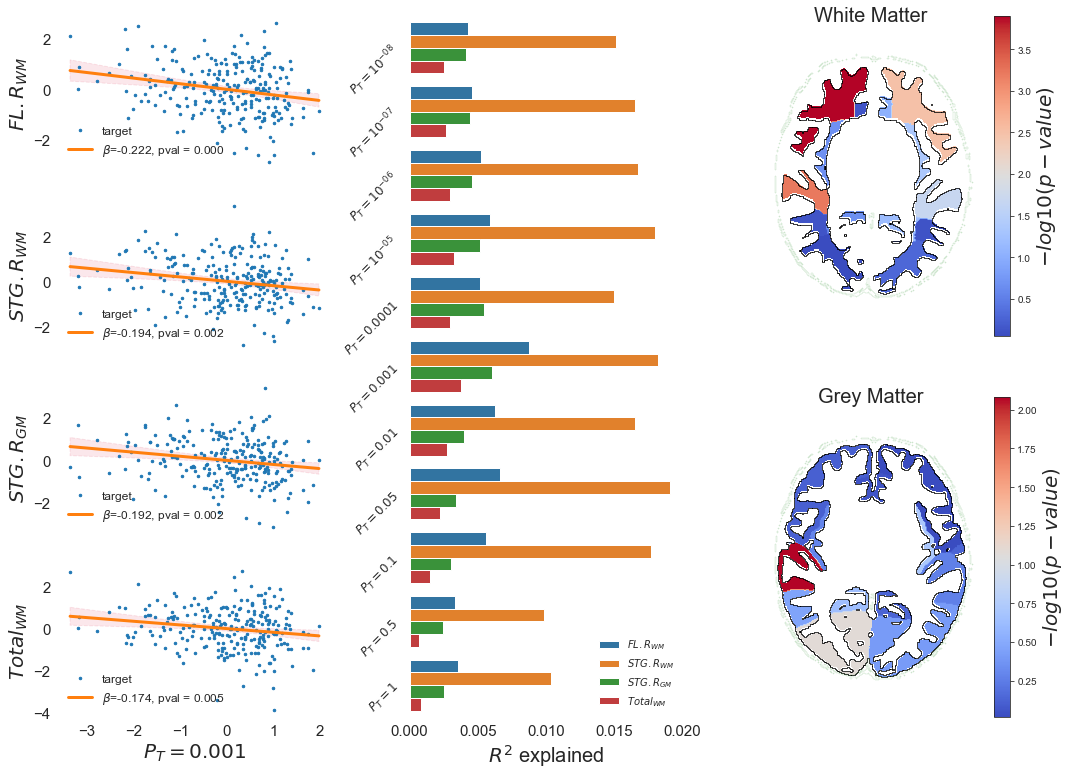

In [138]:
sns.set_style('white')
fig,axes = plt.subplots(4,3,sharex = True,figsize=(15,11))
# fig = plt.figure(figsize=(20,10))
# ax1 = plt.subplot(4,3,1)
# ax2 = plt.subplot(4,3,4)
# ax3 = plt.subplot(4,3,7)
# ax4 = plt.subplot(4,3,10)
for ax in axes[:,1:].flatten():
    ax.remove()
bar_plot = plt.subplot(132)
WM_plot = plt.subplot(233)
GM_plot = plt.subplot(236)
# plt.tight_layout(w_pad =.5, h_pad=.2)
dependent_var = ['Imperial 79','Imperial 58','Imperial 12','WM_sum_Imperial']
ylbl = ['$FL.R_{WM}$', '$STG.R_{WM}$', '$STG.R_{GM}$','$Total_{WM}$']
threshold = 'PRS_0.001'
thresholds_label = '$P_T = 0.001$'
ancestry_list = ['mixed_Anc_PC' + str(i) for i in range(1,4)]
# axes = axes.flatten()
df = mixed_volumetric_dataset_term
# draw the scatter plot
for ax,dependent_variable, ylabel in zip(axes[:,0],dependent_var,ylbl):
    model, _ = data_exploration.MassUnivariate.mass_univariate(df = df,
                                                              cat_independentVar_cols=['Gender'],
                                                              cont_independentVar_cols=[
                                                                  'GA_vol','PMA_vol','Intracranial_Imperial'
                                                              ]+ancestry_list,
                                                              dependentVar_cols=[dependent_variable])
    visualisation.plot_Linear_Reg(x = df[[threshold]].values,
                                 y = model.resid.values,
                                 data = df,
                                 ylabel = ylabel,
                                 xlabel = f'{threshold}',
                                 axes=ax,legend_loc='inside',linewidth = 3,markersize=5)
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(None,fontsize=20)
    ax.tick_params(axis='both',which='major',labelsize=15)
    ax.legend(loc='lower left',fontsize=12,frameon=False)
    sns.despine(bottom=True,left=True,right=True)
axes[-1,0].set_xlabel(f'{thresholds_label}',fontsize=20)

    
#draw the barplot of R-squared explained
Rsquared_explained_list = defaultdict(dict)
for dependent_variable in dependent_var:
    Rsquared_explained_list[dependent_variable] = defaultdict(list)
    for threshold in [i for i in european_volumetric_dataset_term.columns if 'PRS' in i]:
        Rsquared_explained_list[dependent_variable][threshold] = data_exploration.MassUnivariate.calculate_R_squared_explained(df = df,col_to_drop=threshold,cat_independentVar_cols=['Gender'],cont_independentVar_cols=['GA_vol','PMA_vol','Intracranial_Imperial',threshold]+ancestry_list,dependentVar_cols=[dependent_variable])
Rsquared_explained_pd = pd.DataFrame(Rsquared_explained_list)
Rsquared_explained_pd.columns = ylbl

Rsquared_explained_pd = pd.DataFrame(Rsquared_explained_pd.unstack()).reset_index()
Rsquared_explained_pd.columns = ['Region','Threshold','$R^{2}$ explained']

g = sns.barplot(y = 'Threshold',x = '$R^{2}$ explained', data = Rsquared_explained_pd,hue = 'Region',ax = bar_plot)
# g.set_xlabel(rotation=90)
sns.despine(bottom=True,left=True,right=True)
bar_plot.set_xlabel('$R^{2}$ explained',fontsize=20)
bar_plot.set_ylabel(None,fontsize=20)
g.set_yticklabels(['$P_T = 10^{-08}$','$P_T = 10^{-07}$',
                     '$P_T = 10^{-06}$','$P_T = 10^{-05}$',
                     '$P_T = 0.0001$','$P_T = 0.001$',
                     '$P_T = 0.01$','$P_T = 0.05$',
                    '$P_T = 0.1$','$P_T = 0.5$','$P_T = 1$'],fontsize=12,rotation = 45)
g.tick_params(axis='x', labelsize=15)
bar_plot.legend(frameon=False)

#import the atlas
import nibabel as nib
FOLDER_PATH = f'{dataset_path}/visualise/Imperial/'  # please change to your own path

atlas_file = nib.load(FOLDER_PATH + 'atlas_t40.nii.gz')
atlas_aff = atlas_file.affine
atlas = atlas_file.get_fdata()

df = mixed_volumetric_term_mass_univariate[mixed_volumetric_term_mass_univariate['threshold'] == 'PRS_0.001'].copy()

df = df[[bool(re.search(r'[1-9]',i)) for i in df['Connection']]].sort_values(by='PRS_pval').reset_index(drop=True)
df['Connection_ID'] = [int(i.split(' ')[1]) for i in df['Connection']]

# Create a new volume of the same size as the atlas
atlas_coeffs_WM = np.zeros_like(atlas)
atlas_coeffs_GM = np.zeros_like(atlas)


WM_df = extract_WM_Imperial(df).reset_index(drop=True)
GM_df = extract_GM_Imperial(df).reset_index(drop=True)
# fig,axes = plt.subplots(1,2,figsize=(20,10))
# Here you will replace each index (0...87) from the atlas with the coefficients you want to plot
for i in WM_df['Connection_ID'].tolist():
    atlas_coeffs_WM[atlas == i] = -np.log10(WM_df.loc[WM_df['Connection_ID'] == i,'PRS_pval'].values)

for i in GM_df['Connection_ID'].tolist():
    atlas_coeffs_GM[atlas == i] = -np.log10(GM_df.loc[GM_df['Connection_ID'] == i,'PRS_pval'].values)


# im1 = WM_plot.imshow(np.rot90(atlas_coeffs_WM[:, :, atlas_coeffs_WM.shape[2]//2]),cmap='coolwarm')
# im2 = GM_plot.imshow(np.rot90(atlas_coeffs_GM[:, :, atlas_coeffs_GM.shape[2]//2]),cmap='coolwarm')

import copy
from matplotlib.collections import LineCollection

cmap = copy.copy(plt.cm.get_cmap('coolwarm'))
cmap.set_bad(alpha=0)

# atlas_coeffs_WM[atlas==84] = 0.1
WM_atlas = atlas_coeffs_WM[:, :, atlas_coeffs_WM.shape[2]//2]
GM_atlas = atlas_coeffs_GM[:, :, atlas_coeffs_GM.shape[2]//2]

WM_atlas[WM_atlas==0] = np.nan
GM_atlas[GM_atlas==0] = np.nan

im1 = WM_plot.imshow(np.rot90(WM_atlas),cmap=cmap)
im2 = GM_plot.imshow(np.rot90(GM_atlas),cmap=cmap)

WM_atlas[np.isnan(WM_atlas)] = 0
GM_atlas[np.isnan(GM_atlas)] = 0

brain_background = np.zeros(atlas.shape)
brain_background[atlas==84] = 1
brain_background = brain_background[:, :, brain_background.shape[2]//2]

cl_WM = LineCollection(visualisation.get_edges(np.rot90(WM_atlas)),lw=1,color='k')
WM_plot.add_collection(cl_WM)

cl_GM = LineCollection(visualisation.get_edges(np.rot90(GM_atlas)),lw=1,color='k')
GM_plot.add_collection(cl_GM)


cl_background = LineCollection(visualisation.get_edges(np.rot90(brain_background)),lw=0.1,color='g')
WM_plot.add_collection(cl_background)
cl_background = LineCollection(visualisation.get_edges(np.rot90(brain_background)),lw=0.1,color='g')
GM_plot.add_collection(cl_background)

for im,ax in zip([im1,im2],[WM_plot,GM_plot]):
    cbar = plt.colorbar(im,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    cbar.set_label('$-log10(p-value)$', fontsize=20)
WM_plot.set_title('White Matter',fontsize=20)
GM_plot.set_title('Grey Matter', fontsize=20)
# WM_plot.set_ylabel('White Matter',fontsize=20)
# GM_plot.set_ylabel('Grey Matter',fontsize=20)
plt.tight_layout()
fig.savefig(f'{preprocessed_dataset_path}/output_plot/all_plots_mixed.svg')

# Other tests

### High and low risk

In [142]:
threshold = 'PRS_0.01_ASD_Euro_LD'
dependentVar = ['Brain_PC4']


def high_low_risk_for_catplot(df, dependentVar, ancestry_PCs, threshold, perc):
    high_risk, low_risk = data_exploration.Stability_tests.divide_high_low_risk(
        data_exploration.MassUnivariate.adjust_covariates_with_lin_reg(df,
                                                                       cont_independentVar_cols=ancestry_PCs,
                                                                       dependentVar_cols=[threshold]),
        low_perc=perc,
        high_perc=perc)
    temp_high_risk = df.loc[high_risk.index, dependentVar].reset_index(drop=True)
    temp_high_risk['Percentages'] = perc
    temp_high_risk['Risk'] = 'High'
    temp_low_risk = df.loc[low_risk.index, dependentVar].reset_index(drop=True)
    temp_low_risk['Percentages'] = perc
    temp_low_risk['Risk'] = 'Low'
    return pd.concat([temp_high_risk, temp_low_risk])


risk_df = pd.concat([
    high_low_risk_for_catplot(df, dependentVar, ancestry, threshold, perc) for perc in [0.1,0.2,0.3,0.4]])
risk_df = risk_df.reset_index(drop=True)

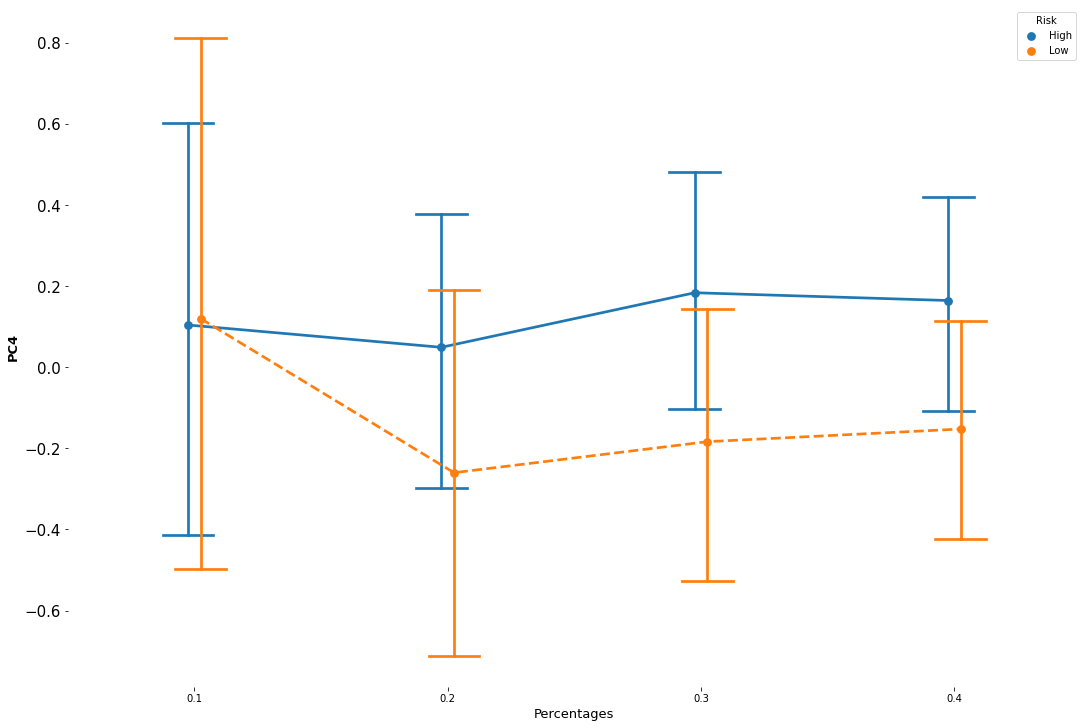

In [144]:
fig,axes = plt.subplots(1,1,figsize=(15,10),constrained_layout=True,sharex=True)
# axes[1,1].remove()
# axes = axes.flatten()
for ax, variable,var_name in zip([axes],dependentVar,['PC4']):
    sns.pointplot(x='Percentages',
                  y=variable,
                  data=risk_df,
                  hue='Risk',
                  dodge=True,
#                  markers=['o','x'],
                 linestyles=['-','--'],capsize=.2,ax=ax)
    sns.despine(top=True,bottom=True,right=True,left=True)
    ax.set_ylabel(var_name,fontdict={'fontsize':13,'fontweight':'bold'})
    ax.set_xlabel('Percentages',fontdict={'fontsize':13})
    ax.tick_params(axis='y', labelsize=15)
# plt.savefig(f'{preprocessed_dataset_path}/output_plot/high_low_risk_european.svg')

In [149]:
risk_df.columns

Index(['Brain_PC4', 'Percentages', 'Risk'], dtype='object')

In [153]:
[data_exploration.Stability_tests.perform_t_test(risk_df.loc[(risk_df['Percentages']==perc)&(risk_df['Risk']=='High'),'Brain_PC4'].values,risk_df.loc[(risk_df['Percentages']==perc)&(risk_df['Risk']=='Low'),'Brain_PC4'].values) for perc in [0.1,0.2,0.3,0.4]]

[(-0.035070039746550825, 0.9721983212441256),
 (1.0477709603778798, 0.29789939990088826),
 (1.6395391634177903, 0.10367715718866838),
 (1.5771528420636391, 0.11671110274633925)]

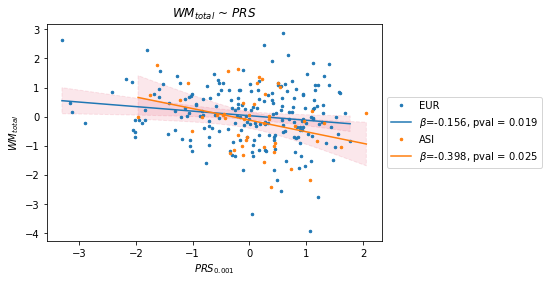

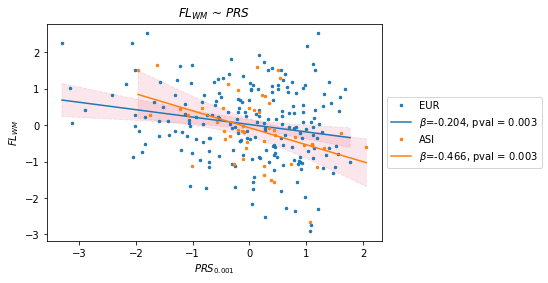

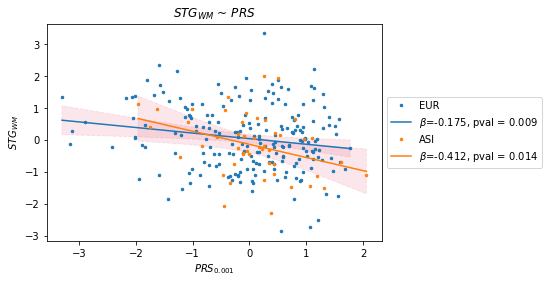

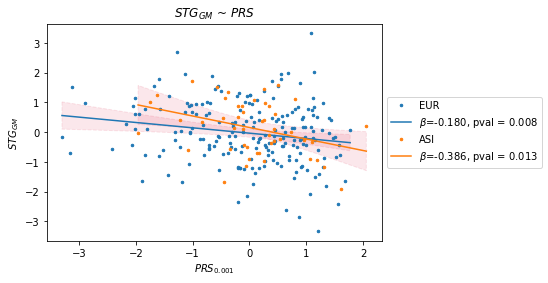

In [11]:
dependent_var = [
    'WM_sum_Imperial', 'Imperial 79', 'Imperial 58', 'Imperial 12'
]
ylbl = ['$WM_{total}$', '$FL_{WM}$', '$STG_{WM}$', '$STG_{GM}$']
ancestry = ['mixed_Anc_PC' + str(i) for i in range(1, 6)]
df = mixed_volumetric_dataset_term

for var, ylabel in (zip(dependent_var, ylbl)):
    model, _ = data_exploration.MassUnivariate.mass_univariate(
        df=df,
        cat_independentVar_cols=['Gender'],
        cont_independentVar_cols=[
            'GA_vol', 'PMA_vol', 'Intracranial_Imperial'
        ],
        dependentVar_cols=[var])
    model2, _ = data_exploration.MassUnivariate.mass_univariate(
        df=df,
        cont_independentVar_cols=ancestry,
        dependentVar_cols=['PRS_0.001'])
#     plt.style.use('seaborn-whitegrid')
    visualisation.plot_Linear_Reg(
        model2.resid.values,
        model.resid.values,
        data=mixed_volumetric_dataset_term,
        ylabel=ylabel,
        xlabel='$PRS_{0.001}$',
        hue='cohort',
        title='%s ~ $PRS$' % ylabel,
        combined=False,
    markersize=5)

## Other tests

### check if removing or adding variables changes the R2

In [13]:
all_models = data_exploration.MassUnivariate.check_all_predictors_combo_linear_Reg(df = mixed_volumetric_dataset_term,
                                           cat_independentVar_cols=['Gender'],
                                           cont_independentVar_cols=['PRS_0.001','mixed_Anc_PC1','mixed_Anc_PC2','mixed_Anc_PC3',
                                                                     'mixed_Anc_PC4','mixed_Anc_PC5',
                                                                    'GA_vol','PMA_vol','Intracranial_Imperial'],
                                          dependentVar_cols=['WM_sum_Imperial'])

100%|███████████████████████████████████████████| 10/10 [00:10<00:00,  1.06s/it]


In [15]:
model_score_summary, model_var_summary, model_beta_summary, model_p_summary = data_exploration.MassUnivariate.preprocess_forward_selection(all_models)

The best model is when including all the covariates, but with less it still achieves similar results

In [22]:
model_score_summary.sort_values(by='R2',ascending=False)

,N_var,AIC,R2,R2_adj
1023,10,215.648386,8.756160e-01,8.705597e-01
1018,9,213.648958,8.756157e-01,8.710835e-01
1020,9,213.742773,8.755703e-01,8.710364e-01
994,8,211.747326,8.755681e-01,8.715541e-01
1019,9,213.916692,8.754860e-01,8.709491e-01
...,...,...,...,...
7,1,731.878817,5.647762e-03,1.748342e-03
47,2,735.165348,6.575971e-04,-7.211241e-03
8,1,733.195754,5.393560e-04,-3.380098e-03
6,1,733.309411,9.725271e-05,-3.823935e-03


<AxesSubplot:xlabel='N_var'>

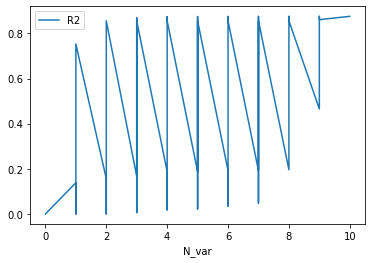

In [24]:
model_score_summary.plot('N_var','R2')

### adding preterm

In [29]:
european_volumetric_preterm_term_mass_univariate = pd.read_csv(
    './preprocessed_dataset/imaging_data/volumetric/preterm_term/european_volumetric_preterm_term_mass_univariate.csv'
)

In [32]:
data_preprocessing.Volumes.extract_WM_Imperial(european_volumetric_preterm_term_mass_univariate).sort_values(by='PRS_pval')

,Connection,const_coef,const_pval,GA_vol_coef,GA_vol_pval,PMA_vol_coef,PMA_vol_pval,euro_Anc_PC1_coef,euro_Anc_PC1_pval,euro_Anc_PC2_coef,euro_Anc_PC2_pval,euro_Anc_PC3_coef,euro_Anc_PC3_pval,Intracranial_Imperial_coef,Intracranial_Imperial_pval,PRS_coef,PRS_pval,Gender_2.0_coef,Gender_2.0_pval,threshold
630,Imperial 79,0.089234,0.009166,0.222168,1.095722e-10,-0.598642,1.375070e-21,-0.036649,0.158641,-0.028282,0.262465,0.019237,0.433409,1.248126,4.956868e-67,-0.070116,0.005742,-0.197588,0.000222,PRS_0.1
558,Imperial 79,0.088570,0.009781,0.221963,1.188279e-10,-0.599497,1.328617e-21,-0.034744,0.180228,-0.028948,0.252092,0.019136,0.436547,1.249594,4.398070e-67,-0.067245,0.007844,-0.196119,0.000251,PRS_0.05
414,Imperial 79,0.086724,0.011485,0.222626,1.086336e-10,-0.605411,5.751416e-22,-0.031050,0.227522,-0.027863,0.270361,0.014314,0.558126,1.255667,1.133521e-67,-0.064906,0.009110,-0.192031,0.000343,PRS_0.001
270,Imperial 79,0.086523,0.011685,0.222842,1.049350e-10,-0.608548,3.778565e-22,-0.027886,0.275968,-0.026680,0.291166,0.011953,0.624339,1.259979,4.896486e-68,-0.064263,0.009188,-0.191586,0.000354,PRS_1e-05
280,WM_sum_Imperial,0.094424,0.000977,0.186887,7.194661e-11,-0.494796,1.970774e-21,-0.020011,0.346474,-0.022522,0.283408,0.005777,0.775667,1.222138,4.033948e-80,-0.052604,0.010241,-0.209081,0.000003,PRS_1e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Imperial 55,-0.014055,0.814985,0.294812,7.870784e-07,-0.267992,8.047819e-03,0.062955,0.168771,0.029200,0.512209,0.001909,0.964887,0.784182,5.136692e-16,-0.001004,0.981913,0.031123,0.738435,PRS_0.05
339,Imperial 66,0.102358,0.041317,0.060628,2.105757e-01,-0.551098,2.278240e-10,0.000105,0.997776,-0.027987,0.449537,-0.024654,0.490684,1.202985,3.573970e-40,0.000623,0.986190,-0.226651,0.003773,PRS_0.0001
254,Imperial 51,0.075592,0.178395,0.035679,5.111853e-01,0.075170,4.215992e-01,-0.000051,0.999042,-0.022600,0.586387,-0.015904,0.691993,0.693568,7.734637e-15,0.000643,0.987273,-0.167383,0.055429,PRS_1e-05
38,Imperial 51,0.075549,0.178456,0.035702,5.108313e-01,0.075171,4.215911e-01,-0.000130,0.997530,-0.022595,0.586482,-0.015888,0.692314,0.693525,7.580347e-15,-0.000250,0.995037,-0.167286,0.055354,PRS_1e-08
